- The results from the validation of three cases has been analzed here:


Note:
- All of the input files was generated from the jupyter notebooks: {Case_name}_pestpp_fileprep
- The outputs was analyzed from the jupyter notebooks: Output_analysis_{Case_name}. The corresponding files were extracted from these jupyter notebook to be analyzed here.

The following files will be analyzed in this notebook:
1. Simulated temperature and moisture 
2. Surface energy balance (SEB) with active layer depth 
3. Surface water balance (SWB) with active layer depth
4. SEB and SWB with active layer depth 


A comparison for the three cases will be made here!

In [1]:
#import sys
#sys.path.insert(0,'../pestools')

In [2]:
import os
main_cwd = os.getcwd()
print(main_cwd)

D:\Github\datamshapratirupa\10_finalsim


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

### Reading the input datasets

In [6]:
### Reading the excel sheet for Case 1 and Case 2
data_AWS_input_cyclic = pd.read_csv('../1_data_prep/Input_data_Finalsim/Finalsim_input.csv',sep=',',index_col=0)

data_AWS_input_cyclic.head()

,air temperature [K],Soil temperature at - 0.00 m [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2),precipitation snow [m SWE s^-1]_sd0.1,precipitation snow [m SWE s^-1]_sd0.2,precipitation snow [m SWE s^-1]_sd0.45,precipitation snow [m SWE s^-1]_sd0.04,precipitation snow [m SWE s^-1]_sd0.01
TIMESTAMP,,,,,,,,,,,
1,260.219613,258.657858,5.959927,0.0,0.250777,146.394057,1.481626e-08,2.963252e-08,6.667318e-08,5.926505e-09,1.481626e-09
1,260.339877,259.027009,4.961648,0.0,0.297514,130.161964,2.411262e-10,4.822523e-10,1.085068e-09,9.645046e-11,2.411262e-11
1,258.946128,258.450812,4.406385,0.0,0.523100,105.254937,1.446759e-10,2.893519e-10,6.510417e-10,5.787037e-11,1.446759e-11
1,258.590429,258.345566,4.906929,0.0,0.458608,117.272839,5.304780e-10,1.060956e-09,2.387151e-09,2.121912e-10,5.304780e-11
1,259.890134,259.327757,5.046729,0.0,0.327822,144.499083,2.893519e-10,5.787037e-10,1.302083e-09,1.157407e-10,2.893519e-11


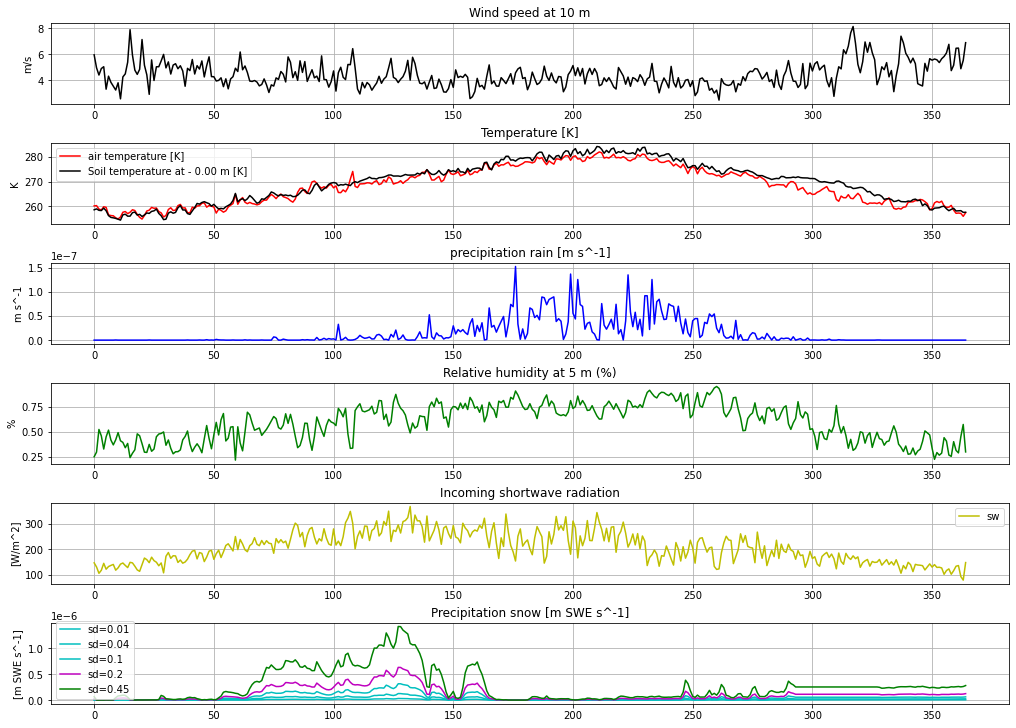

In [7]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_AWS_input_cyclic['Wind speed at 10 m (m/s)'].values,'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Temperature [K]')
f2_ax2.plot(data_AWS_input_cyclic['air temperature [K]'].values, 'r',label='air temperature [K]')
f2_ax2.plot(data_AWS_input_cyclic['Soil temperature at - 0.00 m [K]'].values, 'k',label='Soil temperature at - 0.00 m [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_AWS_input_cyclic['precipitation rain [m s^-1]'].values, 'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('m s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_input_cyclic['Relative humidity at 5 m (%)'].values, 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_AWS_input_final['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_AWS_input_cyclic['Incoming shortwave radiation (W/m^2)'].values, 'y',label='sw')
f2_ax5.set_ylabel('[W/m^2]')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

f2_ax6.set_title('Precipitation snow [m SWE s^-1]')
#f2_ax5.plot(data_AWS_input_final['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax6.plot(data_AWS_input_cyclic['precipitation snow [m SWE s^-1]_sd0.01'].values, 'c',label='sd=0.01')
f2_ax6.plot(data_AWS_input_cyclic['precipitation snow [m SWE s^-1]_sd0.04'].values, 'c',label='sd=0.04')
f2_ax6.plot(data_AWS_input_cyclic['precipitation snow [m SWE s^-1]_sd0.1'].values, 'c',label='sd=0.1')
f2_ax6.plot(data_AWS_input_cyclic['precipitation snow [m SWE s^-1]_sd0.2'].values, 'm',label='sd=0.2')
f2_ax6.plot(data_AWS_input_cyclic['precipitation snow [m SWE s^-1]_sd0.45'].values, 'g',label='sd=0.45')
f2_ax6.set_ylabel('[m SWE s^-1]')
#f2_ax1.set_xlabel('Date')
f2_ax6.legend()
f2_ax6.grid(True)

In [8]:
### Reading the excel sheet for Case 3
data_AWS_input_cyclic_Case3 = pd.read_csv('../1_data_prep/Final_InputData_Case3/Finalsim_inputdata_Case3.csv',sep=',',index_col=0)

data_AWS_input_cyclic_Case3.head()

,air temperature [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2),SWE(m/s)_sd045
TIMESTAMP,,,,,,
1,261.384122,6.292142,0.0,0.222796,144.137767,1.659614e-07
1,261.360351,5.078059,0.0,0.249806,138.719406,1.609701e-07
1,260.239583,4.850806,0.0,0.445328,121.699417,1.621636e-07
1,260.456587,6.320802,0.0,0.369264,127.900927,1.574978e-07
1,261.024340,5.272229,0.0,0.260387,147.837316,1.482205e-07


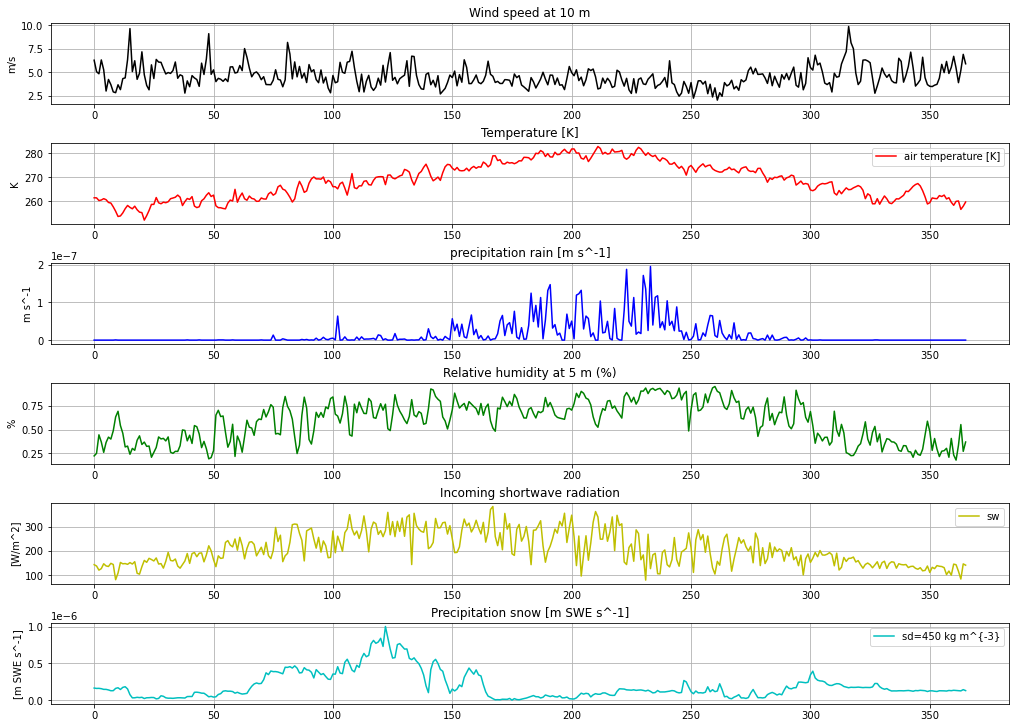

In [9]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_AWS_input_cyclic_Case3['Wind speed at 10 m (m/s)'].values,'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Temperature [K]')
f2_ax2.plot(data_AWS_input_cyclic_Case3['air temperature [K]'].values, 'r',label='air temperature [K]')
#f2_ax2.plot(data_AWS_input_cyclic_Case3['Soil temperature at - 0.00 m [K]'].values, 'k',label='Soil temperature at - 0.00 m [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_AWS_input_cyclic_Case3['precipitation rain [m s^-1]'].values, 'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('m s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_input_cyclic_Case3['Relative humidity at 5 m (%)'].values, 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_AWS_input_final['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_AWS_input_cyclic_Case3['Incoming shortwave radiation (W/m^2)'].values, 'y',label='sw')
f2_ax5.set_ylabel('[W/m^2]')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

f2_ax6.set_title('Precipitation snow [m SWE s^-1]')
#f2_ax5.plot(data_AWS_input_final['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax6.plot(data_AWS_input_cyclic_Case3['SWE(m/s)_sd045'].values, 'c',label='sd=450 kg m^{-3}')
f2_ax6.set_ylabel('[m SWE s^-1]')
#f2_ax1.set_xlabel('Date')
f2_ax6.legend()
f2_ax6.grid(True)

### Reading the observations

In [10]:
df_obs_AWS_cyclic = pd.read_csv('../1_data_prep/Finalsim_OutputData/Finalsim_outputdata_cyclic.csv',sep='\t',index_col=0)
df_obs_AWS_cyclic.head()

,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,7.491743,7.892918,8.429340,8.874757,5.329406,3.713087,5.215873,-14.492142,-13.853212,-12.741701,-12.164062,-10.756979,-8.778948,-5.870307,-4.427099
1,7.541509,7.935122,8.462483,8.873472,5.311170,3.687955,5.180101,-14.122991,-13.348594,-12.317205,-11.859913,-10.680122,-8.876974,-6.061526,-4.609814
2,7.540944,7.940477,8.474167,8.882240,5.300710,3.666684,5.138069,-14.699188,-13.470538,-12.329219,-11.794983,-10.588594,-8.901476,-6.220917,-4.778929
3,7.506554,7.908460,8.447569,8.867760,5.292469,3.649474,5.108906,-14.804434,-13.809740,-12.635677,-12.019965,-10.690191,-8.956571,-6.345726,-4.928622
4,7.520783,7.915139,8.441406,8.848924,5.278311,3.634222,5.082649,-13.822243,-13.422899,-12.420781,-11.957604,-10.778837,-9.065156,-6.464932,-5.065253


In [11]:
# df_obs_AWS_III = pd.read_csv('../1_data_prep/Final_OutputData_Case3/Valid_outputdata_Case3_2017.csv',sep='\t')
# df_obs_AWS_III.head()

### Reading the results

In [12]:
case1_obs = pd.read_csv('Case1_finalsim.demo/observations.dat',skiprows=190,sep=' ')
case2_obs = pd.read_csv('Case2_finalsim_3.demo/observations.dat',skiprows=310,sep=' ')
case3_obs = pd.read_csv('Case3_finalsim_3.demo/observations.dat',skiprows=274,sep=' ')


case2_obs.head()

,time [s],surface energy source [MW m^-2],incoming shortwave radiation [W m^-2],incoming longwave radiation [W m^-2],conducted energy flux [W m^-2],latent heat of evaporation [W m^-2],sensible heat flux [W m^-2],surface-subsurface energy flux [W m^-2],evaporation rate [m s^-1],surface-precipitation rain [m s^-1],...,point -0.01 saturation ice,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice
0,0.0,0.000109,146.394057,169.986769,0.0,-0.514117,40.318022,0.000000,1.819919e-10,0.0,...,0.098458,0.098458,0.481188,0.503211,0.707901,0.723273,0.723252,0.723227,0.723141,0.723210
1,86400.0,-0.000004,130.161964,172.707292,0.0,-0.624777,-53.374496,0.000004,2.209514e-10,0.0,...,0.097761,0.097761,0.481154,0.503231,0.707899,0.723274,0.723253,0.723229,0.723142,0.723209
2,172800.0,-0.000009,105.254937,174.930318,0.0,-0.395276,-44.533979,0.000009,1.398693e-10,0.0,...,0.097607,0.097607,0.481218,0.503282,0.707897,0.723275,0.723254,0.723230,0.723142,0.723209
3,259200.0,-0.000007,117.272839,171.893078,0.0,-0.430599,-51.196428,0.000007,1.523868e-10,0.0,...,0.097316,0.097316,0.481250,0.503313,0.707898,0.723276,0.723255,0.723231,0.723142,0.723209
4,345600.0,-0.000001,144.499083,172.327533,0.0,-0.587238,-63.157270,0.000001,2.076960e-10,0.0,...,0.096708,0.096708,0.481202,0.503284,0.707898,0.723278,0.723256,0.723233,0.723142,0.723209


In [13]:
len(case3_obs)

366

In [14]:
# Converting seconds to days

case1_obs['time [days]'] = case1_obs['time [s]']/86400
case2_obs['time [days]'] = case2_obs['time [s]']/86400
case3_obs['time [days]'] = case3_obs['time [s]']/86400

In [15]:
### Temperature from degree celcius to Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, depth in enumerate(depths):
    case1_obs[f'Soil temperature at - {depth} m (°C)'] = case1_obs[f'point -{depth} temperature [K]'] - 273.15
    case2_obs[f'Soil temperature at - {depth} m (°C)'] = case2_obs[f'point -{depth} temperature [K]'] - 273.15
    case3_obs[f'Soil temperature at - {depth} m (°C)'] = case3_obs[f'point -{depth} temperature [K]'] - 273.15


case1_obs.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -5.0 saturation ice,point -10.0 saturation ice,time [days],Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,0.0,258.367326,259.833831,261.545082,262.858144,264.988292,266.860213,268.139169,270.389262,269.083891,...,0.83818,0.838193,0.0,-14.782674,-13.316169,-11.604918,-10.291856,-8.161708,-6.289787,-5.010831
1,86400.0,259.502493,260.718837,262.269425,263.243814,264.966312,266.715032,267.981638,270.379574,269.087661,...,0.83818,0.838193,1.0,-13.647507,-12.431163,-10.880575,-9.906186,-8.183688,-6.434968,-5.168362
2,172800.0,259.250034,260.802973,262.471564,263.430522,265.003549,266.621471,267.847808,270.367917,269.091431,...,0.83818,0.838193,2.0,-13.899966,-12.347027,-10.678436,-9.719478,-8.146451,-6.528529,-5.302192
3,259200.0,259.161761,260.811283,262.553275,263.523042,265.029505,266.550426,267.732250,270.354777,269.095199,...,0.83818,0.838193,3.0,-13.988239,-12.338717,-10.596725,-9.626958,-8.120495,-6.599574,-5.417750
4,345600.0,259.852597,261.193522,262.750279,263.643778,265.056700,266.494512,267.632169,270.340199,269.098964,...,0.83818,0.838192,4.0,-13.297403,-11.956478,-10.399721,-9.506222,-8.093300,-6.655488,-5.517831


In [16]:
### Saturation of liquid to Volumetric Water Content (VWC - %)

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3

poro_peat_1 = 0.63840773749824
poro_mineral_1 = 0.48163834735695

poro_peat_2 = 0.42152389790647
poro_mineral_2 = 0.36232061622228

poro_peat_3 = 0.64661880775129
poro_mineral_3 = 0.48321096221786



for i, depth in enumerate(depths):
    if depth < depth_peat:
        case1_obs[f'Soil moisture at - {depth} m (%)'] = case1_obs[f'point -{depth} saturation liquid']*(poro_peat_1*100)
        case2_obs[f'Soil moisture at - {depth} m (%)'] = case2_obs[f'point -{depth} saturation liquid']*(poro_peat_2*100)
        case3_obs[f'Soil moisture at - {depth} m (%)'] = case3_obs[f'point -{depth} saturation liquid']*(poro_peat_3*100)
    else:
        case1_obs[f'Soil moisture at - {depth} m (%)'] = case1_obs[f'point -{depth} saturation liquid']*(poro_mineral_1*100)
        case2_obs[f'Soil moisture at - {depth} m (%)'] = case2_obs[f'point -{depth} saturation liquid']*(poro_mineral_2*100)
        case3_obs[f'Soil moisture at - {depth} m (%)'] = case3_obs[f'point -{depth} saturation liquid']*(poro_mineral_3*100)

## Case 2

#### Water balance equation

$$ Q_{water} = S_r + P_r  $$

where $Q_{water}$ is the surface-subsurface water flux, $S_r$ is the condensation (evaporation) rate, $P_r$ is the precipitation rate. 

I was trying to calculate the water balance at the surface, where $Q_{water}$ has to also be subtracted with the surface runoff (here discharge). - Is it not? Could it be that the water can leave from all 4 sides of the surface boundary?


#### Converting the units

* Water flux rate - $\frac{m}{day} = \frac{m}{s} * 86400$

$Density=\frac{Mass}{Volume}$
* Water mass flux rate - $\frac{kg}{day} = \frac{m}{day}*(1*1)*1000$

* 1 mole of water = 18.02 grams of water

$\frac{kg}{day} = \frac{mol}{s} * 18.02 * \frac{86400}{1000}$

In [17]:
len(case2_obs.iloc[1:,:])

365

In [18]:
# For Case 2
case2_obs_whbal = case2_obs.iloc[1:,:].copy()

case2_obs_whbal.head()

,time [s],surface energy source [MW m^-2],incoming shortwave radiation [W m^-2],incoming longwave radiation [W m^-2],conducted energy flux [W m^-2],latent heat of evaporation [W m^-2],sensible heat flux [W m^-2],surface-subsurface energy flux [W m^-2],evaporation rate [m s^-1],surface-precipitation rain [m s^-1],...,Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C),Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%)
1,86400.0,-0.000004,130.161964,172.707292,0.0,-0.624777,-53.374496,0.000004,2.209514e-10,0.0,...,-7.224865,-5.342822,-4.109280,7.611851,7.613173,7.614307,10.025827,10.026360,10.027117,10.027999
2,172800.0,-0.000009,105.254937,174.930318,0.0,-0.395276,-44.533979,0.000009,1.398693e-10,0.0,...,-7.370392,-5.414635,-4.166574,7.608476,7.610487,7.611992,10.025750,10.026318,10.027078,10.027946
3,259200.0,-0.000007,117.272839,171.893078,0.0,-0.430599,-51.196428,0.000007,1.523868e-10,0.0,...,-7.548428,-5.494201,-4.225049,7.607524,7.609254,7.610626,10.025689,10.026269,10.027037,10.027894
4,345600.0,-0.000001,144.499083,172.327533,0.0,-0.587238,-63.157270,0.000001,2.076960e-10,0.0,...,-7.707422,-5.580720,-4.285377,7.610519,7.611161,7.611870,10.025696,10.026226,10.026992,10.027842
5,432000.0,-0.000004,121.346462,175.584692,0.0,-0.484648,-50.112787,0.000004,1.714282e-10,0.0,...,-7.839507,-5.671134,-4.347820,7.610192,7.611164,7.611971,10.025696,10.026193,10.026948,10.027789


In [19]:
### Calculating water balance parameters


#case2_obs_whbal['evaporation rate [m day^-1]'] = case2_obs_whbal['evaporation rate [m s^-1]']*86400
#case2_obs_whbal['precipitation rain [m day^-1]'] = case2_obs_whbal['precipitation rain [m s^-1]']*86400
#case2_obs_whbal['surface-subsurface flux [kg day^-1]'] = case2_obs_whbal['surface-subsurface flux [mol s^-1]']*18.02*(86400/1000)
#case2_obs_whbal['discharge [kg day^-1]'] = case2_obs_whbal['discharge [mol s^-1]']*18.02*(86400/1000)

# Taking a negative sign for water moving into the subsurface
#case2_obs_whbal['Net water flux rate (prep - evap) [m day^-1]'] = -(case2_obs_whbal['precipitation rain [m day^-1]'] - case2_obs_whbal['evaporation rate [m day^-1]'])

#case2_obs_whbal['Net water flux rate (prep - evap) [kg day^-1]'] = case2_obs_whbal['Net water flux rate (prep - evap) [m day^-1]']*(1*1)*1000

#case2_obs_whbal['Net water flux rate (prep - evap - dischr) [kg day^-1]'] = case2_obs_whbal['Net water flux rate (prep - evap) [kg day^-1]'] + case2_obs_whbal['discharge [kg day^-1]']


In [20]:
# Surface runoff
#case2_obs_whbal['Surface runoff (+ve net water flux rate) [kg day^-1]'] = case2_obs_whbal['Net water flux rate (prep - evap) [kg day^-1]']

#case2_obs_whbal['Surface runoff (+ve net water flux rate) [kg day^-1]'][case2_obs_whbal['Net water flux rate (prep - evap) [kg day^-1]'] > 0] = 0

In [21]:
#case2_obs_whbal[['surface-subsurface flux [kg day^-1]']].plot()

In [22]:
#case2_obs_whbal[['Net water flux rate (prep - evap - dischr) [kg day^-1]']].plot()

In [23]:
#(case2_obs_whbal['Net water flux rate (prep - evap - dischr) [kg day^-1]'] - case2_obs_whbal['surface-subsurface flux [kg day^-1]']).plot()

In [24]:
#case2_obs_whbal['discharge [kg day^-1]'].plot()

### Calculating the Energy fluxes

$$ Q_{gf} = (1 - \alpha)Q_{insw} + Q_{inlw} + Q_{outlw}(T_{gs}) + Q_h(T_{gs}) + Q_e(T_{gs})$$ 

where $Q_{gf}$ is the flux of energy into the subsurface (without snow), $Q_{insw}, Q_{inlw}$ are the incoming the outgoing longwave radiation, $Q_h(T_{gs})$ is the sensible heat, $Q_e(T_{gs})$ is the latent heat

we can reformulate this equation as

$$ Q_{gf} = Q_{net} + Q_h(T_{gs}) + Q_e(T_{gs}) $$

where, $$Q_{net} = (1 - \alpha)Q_{insw} + Q_{inlw} + Q_{outlw}(T_{gs})$$

$$Q_{inlw} = \epsilon_a \sigma T_a^4$$

$\sigma$ is the Stefan-Boltzmann constant = 5.670676 X $10^{-8}$ $W m^{-2} K^{-4}$

$T_a$ is the air temperature [K]; 

The emissivity of air ($\epsilon_a$) is calculated by:

$$\epsilon_a = 1.08(1-exp^{{-0.01 e_a}^(\frac{T_a}{2016})}) $$

$e_a$ is the vapor pressure of air = 101325 $\frac{N}{m^2}$

The outgoing longwave radiation is given by
$$Q_{outlw} = \epsilon_s \sigma T_s^4$$

In [25]:
#net_rad = (1-alpha)*data_AWS_input_cyclic['Incoming shortwave radiation (W/m^2)'][:365].values + case2_obs_whbal['incoming longwave radiation [W m^-2]'].values - case2_obs_whbal['outgoing longwave radiation [W m^-2]'].values

In [26]:
#case2_obs_whbal['net radiation [W m^-2]'] = net_rad

In [27]:
# Constants (taken from Case2_finalsim_2.xml file )

alpha = 0.151477
sigma = 5.670676e-8
e_a = 101325
e_a_m = -101325*0.001
emiss_surf = 0.879419

# case2_obs_whbal['surface temperature [K]'], data_AWS_input_cyclic['air temperature [K]']

#case2_obs_whbal['emissivity of air, epsilon_a'] = 1.08 * (1 - (np.exp(-0.01*e_a*(data_AWS_input_cyclic['air temperature [K]'].values/2016))))

case2_obs_whbal['outgoing longwave radiation [W m^-2]'] = emiss_surf*sigma*(case2_obs_whbal['surface temperature [K]']**4)

case2_obs_whbal['net radiation [W m^-2]'] = (1-alpha)*data_AWS_input_cyclic['Incoming shortwave radiation (W/m^2)'][:365].values + case2_obs_whbal['incoming longwave radiation [W m^-2]'].values - case2_obs_whbal['outgoing longwave radiation [W m^-2]'].values

case2_obs_whbal['surf-sub radiation [W m^-2]'] = case2_obs_whbal['net radiation [W m^-2]'] + case2_obs_whbal['sensible heat flux [W m^-2]'] + case2_obs_whbal['latent heat of evaporation [W m^-2]']

case2_obs_whbal.head()

,time [s],surface energy source [MW m^-2],incoming shortwave radiation [W m^-2],incoming longwave radiation [W m^-2],conducted energy flux [W m^-2],latent heat of evaporation [W m^-2],sensible heat flux [W m^-2],surface-subsurface energy flux [W m^-2],evaporation rate [m s^-1],surface-precipitation rain [m s^-1],...,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),outgoing longwave radiation [W m^-2],net radiation [W m^-2],surf-sub radiation [W m^-2]
1,86400.0,-0.000004,130.161964,172.707292,0.0,-0.624777,-53.374496,0.000004,2.209514e-10,0.0,...,7.611851,7.613173,7.614307,10.025827,10.026360,10.027117,10.027999,233.498845,63.427171,9.427898
2,172800.0,-0.000009,105.254937,174.930318,0.0,-0.395276,-44.533979,0.000009,1.398693e-10,0.0,...,7.608476,7.610487,7.611992,10.025750,10.026318,10.027078,10.027946,228.190802,57.184936,12.255682
3,259200.0,-0.000007,117.272839,171.893078,0.0,-0.430599,-51.196428,0.000007,1.523868e-10,0.0,...,7.607524,7.609254,7.610626,10.025689,10.026269,10.027037,10.027894,227.184545,34.019768,-17.607259
4,345600.0,-0.000001,144.499083,172.327533,0.0,-0.587238,-63.157270,0.000001,2.076960e-10,0.0,...,7.610519,7.611161,7.611870,10.025696,10.026226,10.026992,10.027842,232.533511,39.302723,-24.441785
5,432000.0,-0.000004,121.346462,175.584692,0.0,-0.484648,-50.112787,0.000004,1.714282e-10,0.0,...,7.610192,7.611164,7.611971,10.025696,10.026193,10.026948,10.027789,231.605074,66.590413,15.992979


## Case 3

#### Water balance equation

$$ Q_{water} = S_r + P_r  $$

where $Q_{water}$ is the surface-subsurface water flux, $S_r$ is the condensation (evaporation/snow-melt) rate, $P_r$ is the precipitation rate. 

I was trying to calculate the water balance at the surface, where $Q_{water}$ has to also be subtracted with the surface runoff (here discharge). - Is it not? Could it be that the water can leave from all 4 sides of the surface boundary?


#### Converting the units

* Water flux rate - $\frac{m}{day} = \frac{m}{s} * 86400$

$Density=\frac{Mass}{Volume}$
* Water mass flux rate - $\frac{kg}{day} = \frac{m}{day}*(1*1)*1000$

* 1 mole of water = 18.02 grams of water

$\frac{kg}{day} = \frac{mol}{s} * 18.02 * \frac{86400}{1000}$

In [28]:
len(case3_obs.iloc[1:,:])

365

In [29]:
# For Case 2
case3_obs_whbal = case3_obs.iloc[1:,:].copy()

case3_obs_whbal.head()

,time [s],surface energy source [MW m^-2],conducted energy flux [W m^-2],latent heat of evaporation [W m^-2],sensible heat flux [W m^-2],surface-subsurface energy flux [W m^-2],incoming shortwave radiation [W m^-2],incoming longwave radiation [W m^-2],evaporation rate [m s^-1],surface-subsurface flux [m s^-1],...,Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C),Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%)
1,86400.0,-0.000005,-5.489181,-12.784717,40.944441,0.000006,130.161964,174.150214,4.513141e-09,1.354368e-13,...,-1.249806,-0.744534,-0.758532,8.919077,8.933999,8.952236,7.920507,8.049356,8.192020,8.186195
2,172800.0,-0.000005,-4.804939,-6.060214,35.963827,0.000005,105.254937,177.713212,2.139291e-09,1.449084e-13,...,-1.433369,-0.864912,-0.808687,8.921101,8.934257,8.949867,7.911023,8.016605,8.146607,8.166568
3,259200.0,-0.000004,-4.000900,-16.423374,50.555694,0.000004,117.272839,176.033192,5.797447e-09,1.592060e-13,...,-1.584634,-0.986956,-0.869734,8.923930,8.935465,8.948993,7.905231,7.993972,8.109252,8.144985
4,345600.0,-0.000004,-3.787472,-13.447759,43.067740,0.000004,144.499083,173.460900,4.747023e-09,1.658777e-13,...,-1.709961,-1.104200,-0.938244,8.925215,8.935902,8.948125,7.900924,7.977534,8.079311,8.123294
5,432000.0,-0.000005,-4.561891,-0.614661,15.469298,0.000004,121.346462,176.395464,2.169779e-10,1.477672e-13,...,-1.823445,-1.214845,-1.011035,8.921658,8.932764,8.944852,7.895211,7.964151,8.055092,8.102684


In [30]:
### Check if incoming shortwave radiation from the simulation is 
# same as the incoming shortwave radiation from the meteorological data

case3_obs_whbal['incoming shortwave radiation [W m^-2]']

1      130.161964
2      105.254937
3      117.272839
4      144.499083
5      121.346462
          ...    
361    135.734156
362     92.464865
363     78.452821
364    147.448623
365    147.448623
Name: incoming shortwave radiation [W m^-2], Length: 365, dtype: float64

$$alpha = 1-(sw_{sim}/sw_{mes})$$

In [31]:
len(data_AWS_input_cyclic_Case3)

366

<AxesSubplot:>

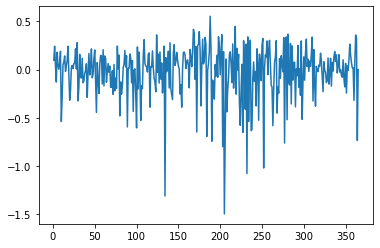

In [32]:
sw_cal = 1 - (case3_obs_whbal['incoming shortwave radiation [W m^-2]']/data_AWS_input_cyclic_Case3['Incoming shortwave radiation (W/m^2)'][:365].values)

sw_cal.plot()

* Clearly the alpha value here is not equal to the alpha value given in the xml file (0.55), therefore this is another incoming shortwave radiation (probably including alpha value of ponded water? or at the different level of the mesh?)

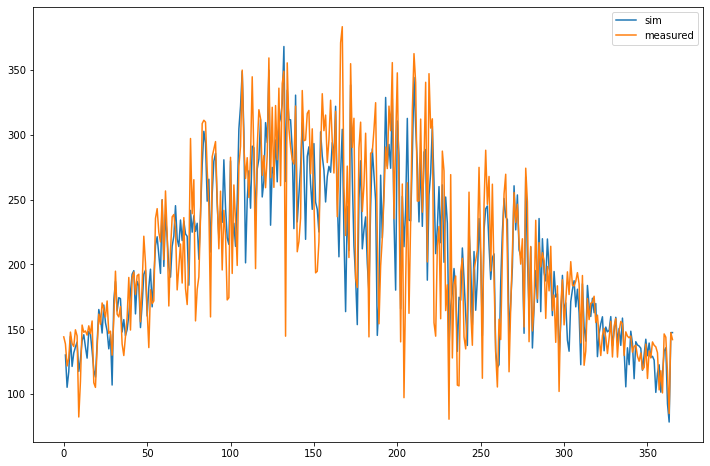

In [33]:
plt.figure(figsize=(12,8))
plt.plot(case3_obs_whbal['incoming shortwave radiation [W m^-2]'],label='sim')
plt.plot(data_AWS_input_cyclic_Case3['Incoming shortwave radiation (W/m^2)'].values,label='measured')
plt.legend()

In [34]:
### Calculating water balance parameters

#case3_obs_whbal['evaporation rate [m day^-1]'] = case3_obs_whbal['evaporation rate [m s^-1]']*86400
#case3_obs_whbal['precipitation rain [m day^-1]'] = case3_obs_whbal['precipitation rain [m s^-1]']*86400
#case3_obs_whbal['surface-subsurface flux [kg day^-1]'] = case3_obs_whbal['surface-subsurface flux [mol s^-1]']*18.02*(86400/1000)
#case3_obs_whbal['discharge [kg day^-1]'] = case3_obs_whbal['discharge [mol s^-1]']*18.02*(86400/1000)

# Taking a negative sign for water moving into the subsurface
#case3_obs_whbal['Net water flux rate (prep - evap) [m day^-1]'] = -(case3_obs_whbal['precipitation rain [m day^-1]'] - case3_obs_whbal['evaporation rate [m day^-1]'])

#case3_obs_whbal['Net water flux rate (prep - evap) [kg day^-1]'] = case3_obs_whbal['Net water flux rate (prep - evap) [m day^-1]']*(1*1)*1000

#case3_obs_whbal['Net water flux rate (prep - evap - dischr) [kg day^-1]'] = case3_obs_whbal['Net water flux rate (prep - evap) [kg day^-1]'] + case3_obs_whbal['discharge [kg day^-1]']


In [35]:
# Surface runoff
#case3_obs_whbal['Surface runoff (+ve net water flux rate) [kg day^-1]'] = case3_obs_whbal['Net water flux rate (prep - evap) [kg day^-1]']

#case3_obs_whbal['Surface runoff (+ve net water flux rate) [kg day^-1]'][case3_obs_whbal['Net water flux rate (prep - evap) [kg day^-1]'] > 0] = 0

In [36]:
#case3_obs_whbal[['surface-subsurface flux [kg day^-1]']].plot()

In [37]:
#case3_obs_whbal[['Net water flux rate (prep - evap - dischr) [kg day^-1]']].plot()

In [38]:
#(case3_obs_whbal['Net water flux rate (prep - evap - dischr) [kg day^-1]'] - case3_obs_whbal['surface-subsurface flux [kg day^-1]']).plot()

In [39]:
#case3_obs_whbal['discharge [kg day^-1]'].plot()

### Calculating the Energy fluxes

$$ 0 = (1 - \alpha)Q_{insw} + Q_{inlw} + Q_{outlw}(T_s) + Q_h(T_s) + Q_e(T_s) + Q_c(T_s)$$ 

where $Q_c(T_s)$ is the conduction of heat from the snow surface through the snowpack to the ground surface, $Q_{insw}, Q_{inlw}$ are the incoming the outgoing longwave radiation, $Q_h(T_s)$ is the sensible heat, $Q_e(T_s)$ is the latent heat

we can reformulate this equation as

$$ 0 = Q_{net} + Q_h(T_s) + Q_e(T_s) + Q_c(T_s) $$

where, $$Q_{net} = (1 - \alpha)Q_{insw} + Q_{inlw} + Q_{outlw}(T_s)$$

$$Q_{inlw} = \epsilon_a \sigma T_a^4$$

$\sigma$ is the Stefan-Boltzmann constant = 5.670676 X $10^{-8}$ $W m^{-2} K^{-4}$

$T_a$ is the air temperature [K]; 

The emissivity of air ($\epsilon_a$) is calculated by:

$$\epsilon_a = 1.08(1-exp^{{-0.01 e_a}^(\frac{T_a}{2016})}) $$

$e_a$ is the vapor pressure of air = 101325 $\frac{N}{m^2}$

The outgoing longwave radiation is given by
$$Q_{outlw} = \epsilon_s \sigma T_s^4$$

In [40]:
# Constants (taken from case3_finalsim_2.xml file )

alpha = 0.55
sigma = 5.670676e-8
e_a = 101325
e_a_m = -101325*0.001
emiss_surf = 5.5000000E-01

# case3_obs_whbal['surface temperature [K]'], data_AWS_input_cyclic['air temperature [K]']

#case3_obs_whbal['emissivity of air, epsilon_a'] = 1.08 * (1 - (np.exp(-0.01*e_a*(data_AWS_input_cyclic['air temperature [K]'].values/2016))))

case3_obs_whbal['outgoing longwave radiation [W m^-2]'] = emiss_surf*sigma*(case3_obs_whbal['surface temperature [K]']**4)

case3_obs_whbal['net radiation [W m^-2]'] = (1-alpha)*data_AWS_input_cyclic_Case3['Incoming shortwave radiation (W/m^2)'][:365].values + case3_obs_whbal['incoming longwave radiation [W m^-2]'].values - case3_obs_whbal['outgoing longwave radiation [W m^-2]'].values

case3_obs_whbal['surf-sub radiation [W m^-2]'] = case3_obs_whbal['net radiation [W m^-2]'] + case3_obs_whbal['sensible heat flux [W m^-2]'] + case3_obs_whbal['conducted energy flux [W m^-2]']

case3_obs_whbal.head()

,time [s],surface energy source [MW m^-2],conducted energy flux [W m^-2],latent heat of evaporation [W m^-2],sensible heat flux [W m^-2],surface-subsurface energy flux [W m^-2],incoming shortwave radiation [W m^-2],incoming longwave radiation [W m^-2],evaporation rate [m s^-1],surface-subsurface flux [m s^-1],...,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),outgoing longwave radiation [W m^-2],net radiation [W m^-2],surf-sub radiation [W m^-2]
1,86400.0,-0.000005,-5.489181,-12.784717,40.944441,0.000006,130.161964,174.150214,4.513141e-09,1.354368e-13,...,8.919077,8.933999,8.952236,7.920507,8.049356,8.192020,8.186195,163.554408,75.457802,110.913062
2,172800.0,-0.000005,-4.804939,-6.060214,35.963827,0.000005,105.254937,177.713212,2.139291e-09,1.449084e-13,...,8.921101,8.934257,8.949867,7.911023,8.016605,8.146607,8.166568,163.804345,76.332600,107.491488
3,259200.0,-0.000004,-4.000900,-16.423374,50.555694,0.000004,117.272839,176.033192,5.797447e-09,1.592060e-13,...,8.923930,8.935465,8.948993,7.905231,7.993972,8.109252,8.144985,164.126846,66.671083,113.225877
4,345600.0,-0.000004,-3.787472,-13.447759,43.067740,0.000004,144.499083,173.460900,4.747023e-09,1.658777e-13,...,8.925215,8.935902,8.948125,7.900924,7.977534,8.079311,8.123294,164.258795,66.757521,106.037789
5,432000.0,-0.000005,-4.561891,-0.614661,15.469298,0.000004,121.346462,176.395464,2.169779e-10,1.477672e-13,...,8.921658,8.932764,8.944852,7.895211,7.964151,8.055092,8.102684,163.889928,79.032328,89.939735


### Plotting the results

#### Plotting Case 1 results

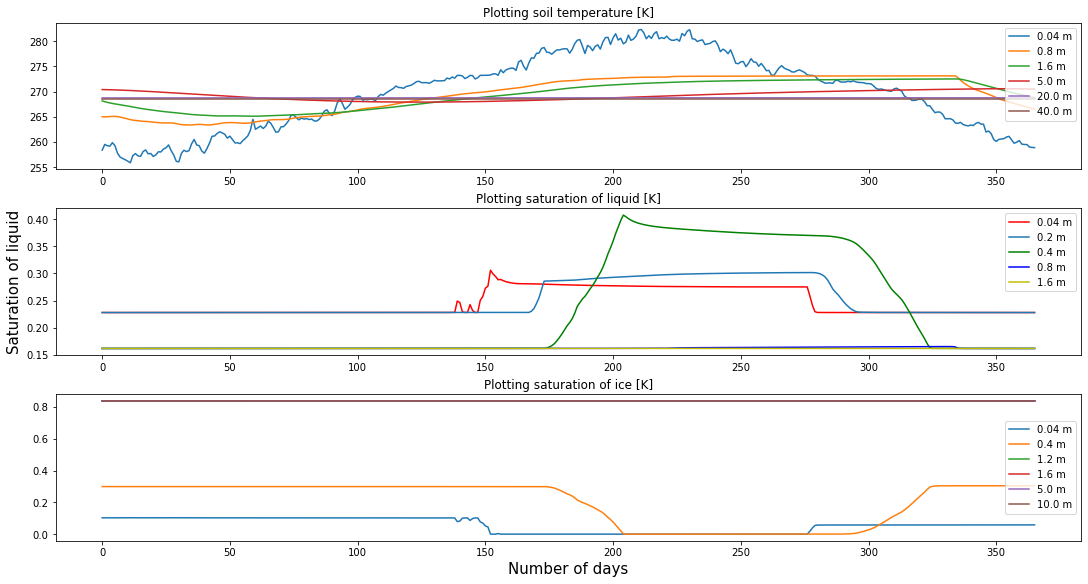

In [41]:
### Plotting the final results (mesured vs simulated) along with the parameters:

fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case1_obs['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_case1['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_case1['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(case1_obs['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_case1['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(case1_obs['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(case1_obs['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_case1['point -10.0 temperature [K]'],label='10.0 m')
f2_ax1.plot(case1_obs['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(case1_obs['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case1_obs['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],'g',label='0.4 m')
f2_ax2.plot(case1_obs['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(case1_obs['point -1.6 saturation liquid'],'y',label='1.6 m')
#f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'],'r--',label='s - 0.04 m')
#f2_ax2.plot(df_obs_AWS['point -0.4 saturation liquid'],'g--',label='s - 0.4 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'],'b--',label='s - 0.8 m')
#f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'],'y--',label='s - 1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case1_obs['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_case1['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(case1_obs['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_case1['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(case1_obs['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(case1_obs['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(case1_obs['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(case1_obs['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()

#### Plotting Case 2 results

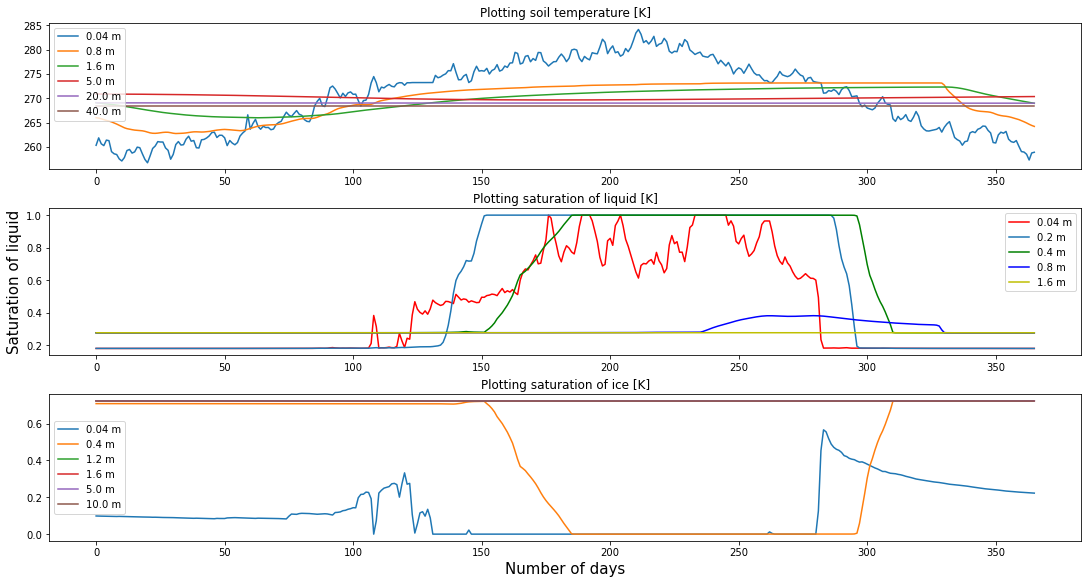

In [42]:
### Plotting the final results (mesured vs simulated) along with the parameters:

fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case2_obs['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_case1['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_case1['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(case2_obs['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_case1['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(case2_obs['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(case2_obs['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_case1['point -10.0 temperature [K]'],label='10.0 m')
f2_ax1.plot(case2_obs['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(case2_obs['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case2_obs['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(case2_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(case2_obs['point -0.4 saturation liquid'],'g',label='0.4 m')
f2_ax2.plot(case2_obs['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(case2_obs['point -1.6 saturation liquid'],'y',label='1.6 m')
#f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'],'r--',label='s - 0.04 m')
#f2_ax2.plot(df_obs_AWS['point -0.4 saturation liquid'],'g--',label='s - 0.4 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'],'b--',label='s - 0.8 m')
#f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'],'y--',label='s - 1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case2_obs['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_case1['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(case2_obs['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_case1['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(case2_obs['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(case2_obs['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(case2_obs['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(case2_obs['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()

### Surface water balance variables
- evaporation rate [m s^-1], surface-subsurface flux [mol s^-1], surface-precipitation rain [m s^-1], discharge [mol s^-1], precipitation snow [m s^-1], snow melt [m s^-1], thaw depth [m], water table depth [m], ponded depth [m], unfrozen effective depth [m], snow-density [kg m^-3]

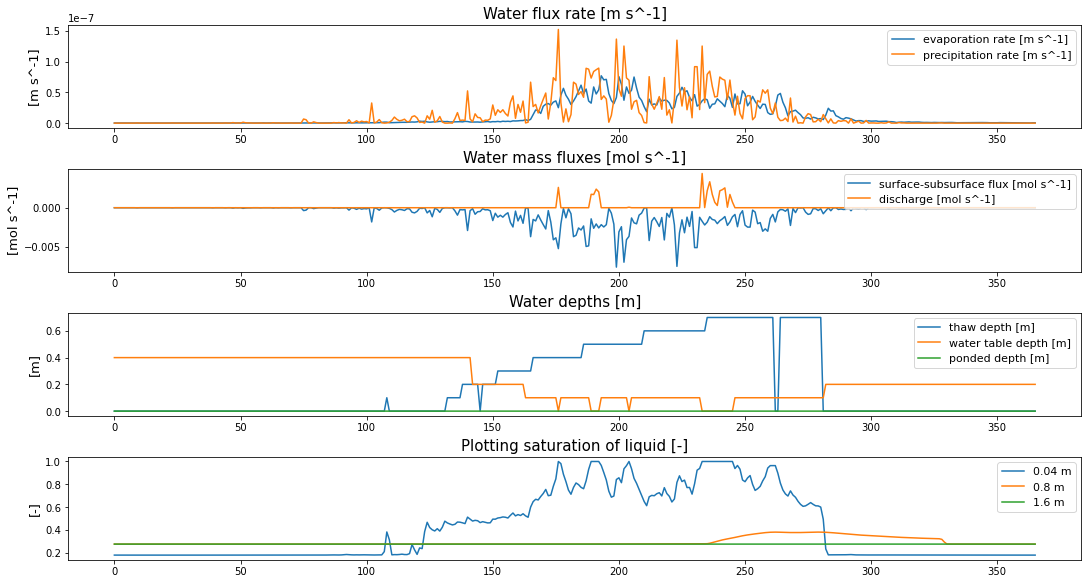

In [43]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
#f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting water fluxes
f2_ax1.set_title('Water flux rate [m s^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case2_obs['evaporation rate [m s^-1]'], label='evaporation rate [m s^-1]')
f2_ax1.plot(case2_obs['precipitation rain [m s^-1]'], label='precipitation rate [m s^-1]')
#f2_ax1.plot(case2_obs['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax1.set_ylabel('[m s^-1]', fontsize=13)
f2_ax1.legend(fontsize=11, loc=1)


# Plotting mass fluxes [mol s^-1]
f2_ax2.set_title('Water mass fluxes [mol s^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case2_obs['surface-subsurface flux [mol s^-1]'], label="surface-subsurface flux [mol s^-1]")
f2_ax2.plot(case2_obs['discharge [mol s^-1]'], label="discharge [mol s^-1]")
f2_ax2.set_ylabel('[mol s^-1]', fontsize=13)
f2_ax2.legend(fontsize=11, loc=1)

# Plotting depths [m]
f2_ax3.set_title('Water depths [m]', fontsize=15)
f2_ax3.plot(case2_obs['thaw depth [m]'], label='thaw depth [m]')
f2_ax3.plot(case2_obs['water table depth [m]'], label='water table depth [m]')
f2_ax3.plot(case2_obs['ponded depth [m]'], label='ponded depth [m]')
f2_ax3.set_ylabel('[m]', fontsize=13)
#f2_ax3.plot(case2_obs['unfrozen effective depth [m]'], label='unfrozen effective depth [m]')
f2_ax3.legend(fontsize=11, loc=1)

# Plotting snow density [kg m^-3]
#f2_ax4.set_title('Snow density [kg m^-3]')
#f2_ax4.plot(case2_obs['snow-density [kg m^-3]'], label='snow density [kg m^-3]')
#f2_ax4.legend()

# Plotting saturation of liquid
f2_ax4.set_title('Plotting saturation of liquid [-]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case2_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax4.plot(case2_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax4.plot(case2_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case2_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case2_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax4.set_ylabel('[-]', fontsize=13)
f2_ax4.legend(fontsize=11, loc=1)

* Thaw depth is the vertical distance from the surface to the frozen cell (Temperature at 0°C or below). 

* Water table depth is the vertical distance from the surface to the completely saturated cell. 

* Refer this thread: https://groups.google.com/g/ats-users/c/tXHjs7orSC8/m/D8286lcXBwAJ

In [45]:
case2_obs['thaw depth [m]'].max()

0.7

#### Converting the units

$\frac{m}{day} = \frac{m}{s} * 86400$

$\frac{kg}{day} = \frac{mol}{s} * 18.02 * \frac{86400}{1000}$

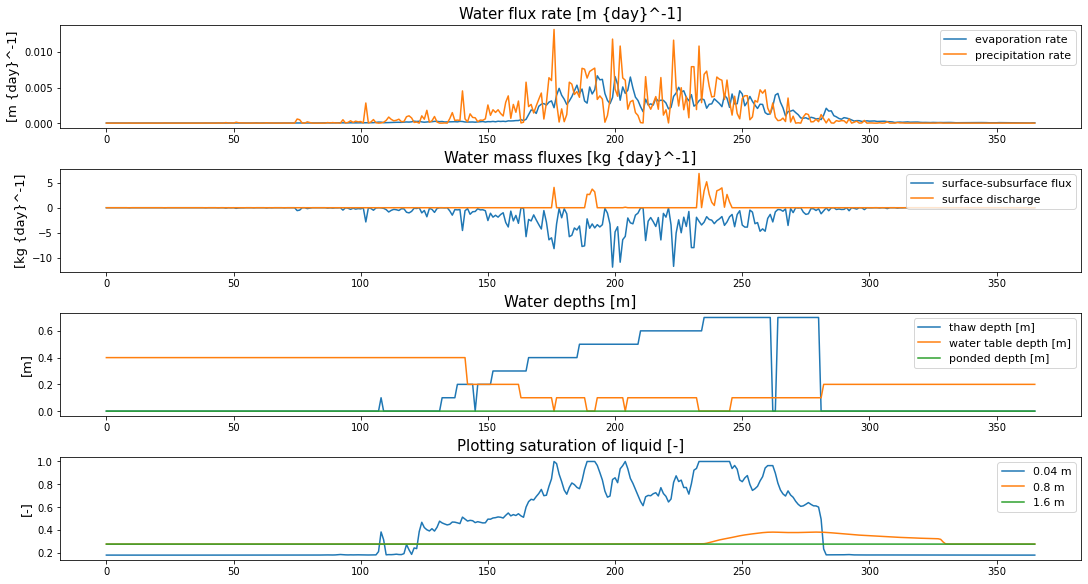

In [44]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
#f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting water fluxes
f2_ax1.set_title('Water flux rate [m {day}^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case2_obs['evaporation rate [m s^-1]']*86400, label='evaporation rate')
f2_ax1.plot(case2_obs['precipitation rain [m s^-1]']*86400, label='precipitation rate')
#f2_ax1.plot(case2_obs['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax1.set_ylabel('[m {day}^-1]', fontsize=13)
f2_ax1.legend(fontsize=11, loc=1)


# Plotting mass fluxes [mol s^-1]
f2_ax2.set_title('Water mass fluxes [kg {day}^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case2_obs['surface-subsurface flux [mol s^-1]']*18.02*86400/1000, label="surface-subsurface flux")
f2_ax2.plot(case2_obs['discharge [mol s^-1]']*18.02*86400/1000, label="surface discharge")
f2_ax2.set_ylabel('[kg {day}^-1]', fontsize=13)
f2_ax2.legend(fontsize=11, loc=1)

# Plotting depths [m]
f2_ax3.set_title('Water depths [m]', fontsize=15)
f2_ax3.plot(case2_obs['thaw depth [m]'], label='thaw depth [m]')
f2_ax3.plot(case2_obs['water table depth [m]'], label='water table depth [m]')
f2_ax3.plot(case2_obs['ponded depth [m]'], label='ponded depth [m]')
f2_ax3.set_ylabel('[m]', fontsize=13)
#f2_ax3.plot(case2_obs['unfrozen effective depth [m]'], label='unfrozen effective depth [m]')
f2_ax3.legend(fontsize=11, loc=1)

# Plotting snow density [kg m^-3]
#f2_ax4.set_title('Snow density [kg m^-3]')
#f2_ax4.plot(case2_obs['snow-density [kg m^-3]'], label='snow density [kg m^-3]')
#f2_ax4.legend()

# Plotting saturation of liquid
f2_ax4.set_title('Plotting saturation of liquid [-]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case2_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax4.plot(case2_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax4.plot(case2_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case2_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case2_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax4.set_ylabel('[-]', fontsize=13)
f2_ax4.legend(fontsize=11, loc=1)

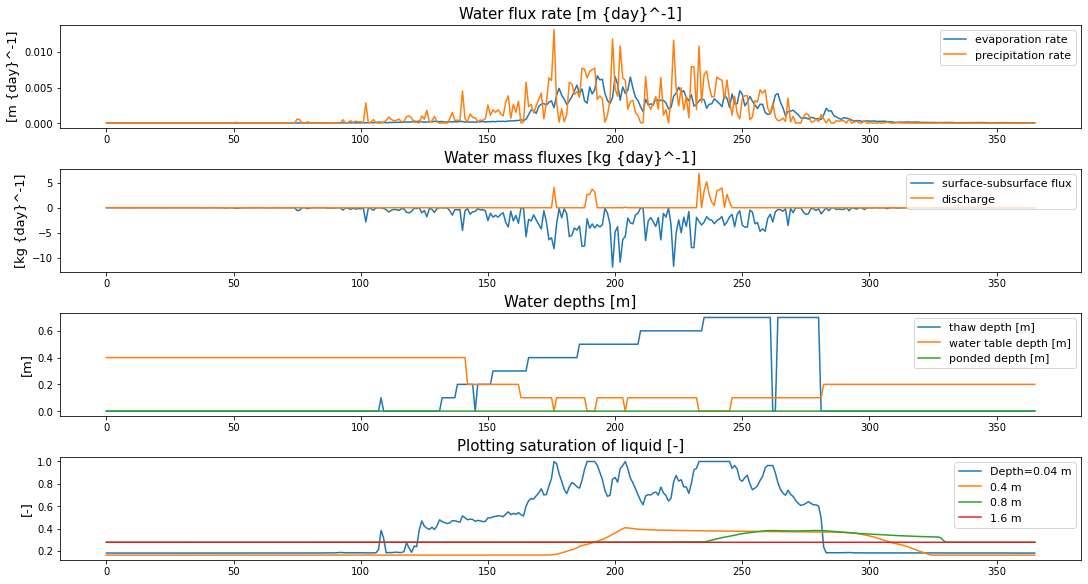

In [45]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
#f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting water fluxes
f2_ax1.set_title('Water flux rate [m {day}^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case2_obs['evaporation rate [m s^-1]']*86400, label='evaporation rate')
f2_ax1.plot(case2_obs['precipitation rain [m s^-1]']*86400, label='precipitation rate')
#f2_ax1.plot(case2_obs['precipitation rain [m s^-1]']*86400 - case2_obs['evaporation rate [m s^-1]']*86400, label='Net water flux rate')
#f2_ax1.plot(case2_obs['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax1.set_ylabel('[m {day}^-1]', fontsize=13)
f2_ax1.legend(fontsize=11, loc=1)


# Plotting mass fluxes [mol s^-1]
f2_ax2.set_title('Water mass fluxes [kg {day}^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case2_obs['surface-subsurface flux [mol s^-1]']*18.02*86400/1000, label="surface-subsurface flux")
f2_ax2.plot(case2_obs['discharge [mol s^-1]']*18.02*86400/1000, label="discharge")
f2_ax2.set_ylabel('[kg {day}^-1]', fontsize=13)
f2_ax2.legend(fontsize=11, loc=1)

# Plotting depths [m]
f2_ax3.set_title('Water depths [m]', fontsize=15)
f2_ax3.plot(case2_obs['thaw depth [m]'], label='thaw depth [m]')
f2_ax3.plot(case2_obs['water table depth [m]'], label='water table depth [m]')
f2_ax3.plot(case2_obs['ponded depth [m]'], label='ponded depth [m]')
f2_ax3.set_ylabel('[m]', fontsize=13)
#f2_ax3.plot(case2_obs['unfrozen effective depth [m]'], label='unfrozen effective depth [m]')
f2_ax3.legend(fontsize=11, loc=1)

# Plotting snow density [kg m^-3]
#f2_ax4.set_title('Snow density [kg m^-3]')
#f2_ax4.plot(case2_obs['snow-density [kg m^-3]'], label='snow density [kg m^-3]')
#f2_ax4.legend()

# Plotting saturation of liquid
f2_ax4.set_title('Plotting saturation of liquid [-]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case2_obs['point -0.04 saturation liquid'],label='Depth=0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax4.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax4.plot(case2_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax4.plot(case2_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case2_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case2_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax4.set_ylabel('[-]', fontsize=13)
f2_ax4.legend(fontsize=11, loc=1)

### Plotting the surface energy balance and water balance parameters:
- Surface energy source [MW m^-2], Conducted energy flux [W m^-2], Latent heat of evaporation [W m^-2], Sensible heat flux [W m^-2], Surface-subsurface energy flux [W m^-2];

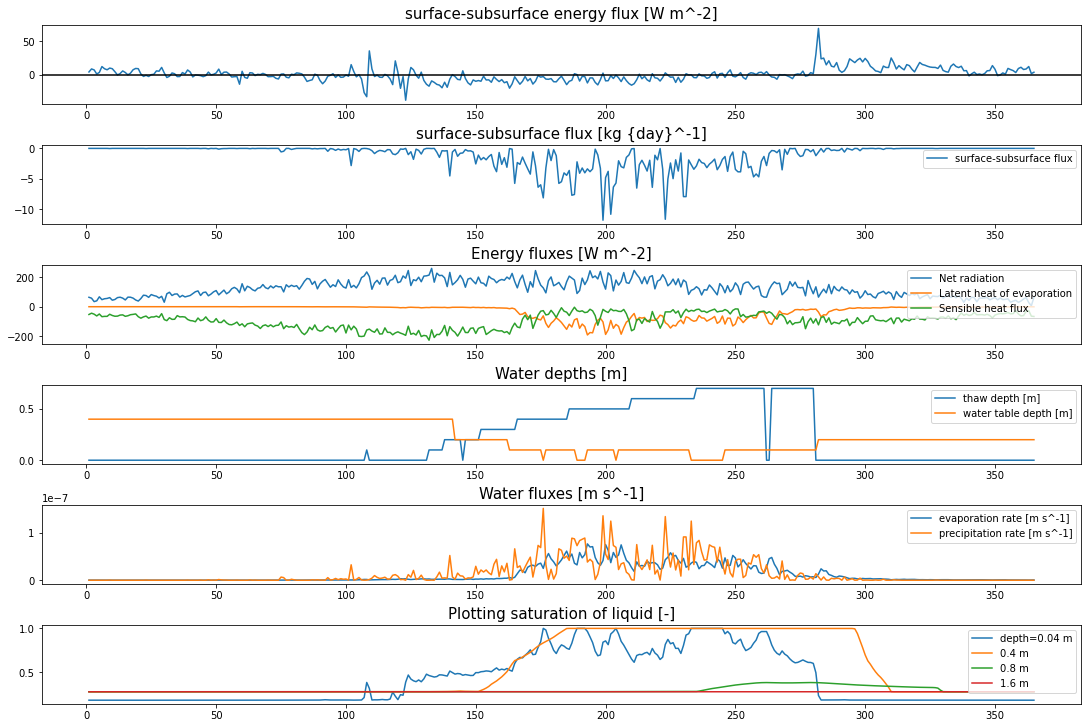

In [46]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

# Plotting Surface energy source
f2_ax1.set_title('surface-subsurface energy flux [W m^-2]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case2_obs_whbal['surface-subsurface energy flux [W m^-2]']*1e6, label='simulation')
f2_ax1.axhline(y=0, color='k')
#f2_ax1.plot(-case2_obs_whbal['surf-sub radiation [W m^-2]'], label="calculated")
#f2_ax1.legend(loc=1)

# Plotting surface - subsurface water fluxes
f2_ax2.set_title('surface-subsurface flux [kg {day}^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case2_obs_whbal['surface-subsurface flux [mol s^-1]']*18.02*86400/1000, label="surface-subsurface flux")

f2_ax2.legend(loc=1)

# Plotting Energy fluxes
f2_ax3.set_title('Energy fluxes [W m^-2]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case2_obs_whbal['net radiation [W m^-2]'], label='Net radiation')
f2_ax3.plot(case2_obs_whbal['latent heat of evaporation [W m^-2]'], label="Latent heat of evaporation")
f2_ax3.plot(case2_obs_whbal['sensible heat flux [W m^-2]'], label="Sensible heat flux")
#f2_ax2.plot(case2_obs_whbal['surf-sub radiation [W m^-2]'], label="surf-sub radiation")
#f2_ax2.plot(case2_obs_whbal['surface-subsurface energy flux [W m^-2]'], label="surface-subsurface energy flux")
#f2_ax2.plot(data_AWS_input_cyclic_Case3['Incoming shortwave radiation (W/m^2)'].values, label="inc sw")
f2_ax3.legend(loc=1)


# Plotting surface-subsurface flux [mol s^-1]
f2_ax4.set_title('Water depths [m]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case2_obs_whbal['thaw depth [m]'], label='thaw depth [m]')
f2_ax4.plot(case2_obs_whbal['water table depth [m]'], label='water table depth [m]')
f2_ax4.legend(loc=1)

# Plotting water fluxes
f2_ax5.set_title('Water fluxes [m s^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case2_obs_whbal['evaporation rate [m s^-1]'], label='evaporation rate [m s^-1]')
f2_ax5.plot(case2_obs_whbal['precipitation rain [m s^-1]'], label='precipitation rate [m s^-1]')
#f2_ax4.plot(case2_obs_whbal['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax5.legend(loc=1)

# Plotting saturation of liquid
f2_ax6.set_title('Plotting saturation of liquid [-]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax6.plot(case2_obs_whbal['point -0.04 saturation liquid'],label='depth=0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax6.plot(case2_obs_whbal['point -0.4 saturation liquid'],label='0.4 m')
f2_ax6.plot(case2_obs_whbal['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax6.plot(case2_obs_whbal['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case2_obs_whbal['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case2_obs_whbal['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax6.legend(loc=1)

* Comments:
    - As you can see, the net energy fluxes during the summer are very low, however, we observe that the water fluxes entering the subsurface have increased. We can then interpret that rainfall has an impact on permafrost degradation!. However, observe that with a steep increase in energy flux around 275 days, the maximum active layer depth is reached.

## Plotting case3

### Surface water balance variables
- evaporation rate [m s^-1], surface-subsurface flux [mol s^-1], surface-precipitation rain [m s^-1], discharge [mol s^-1], precipitation snow [m s^-1], snow melt [m s^-1], thaw depth [m], water table depth [m], ponded depth [m], unfrozen effective depth [m], snow-density [kg m^-3]

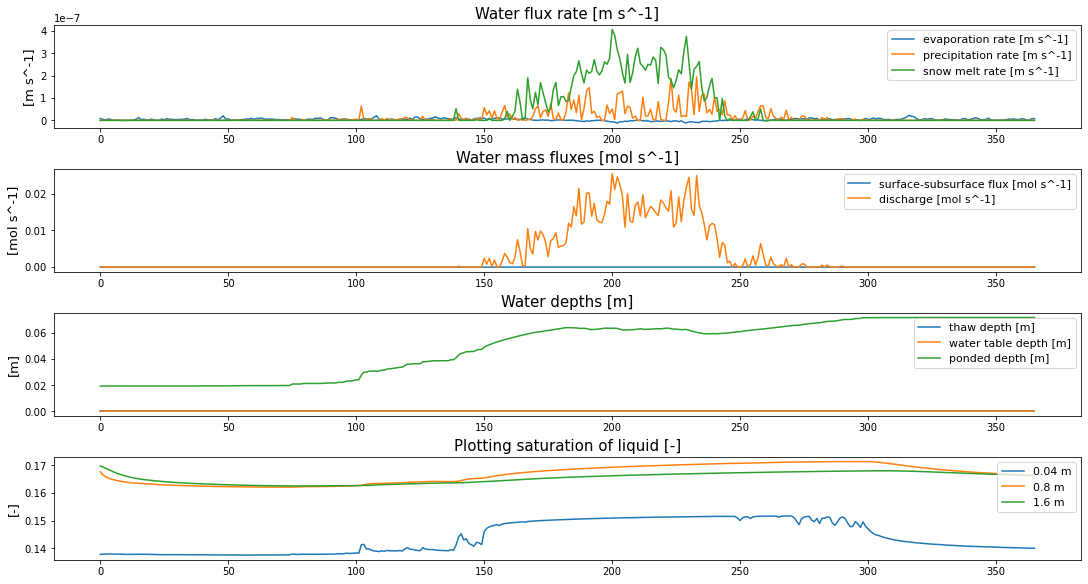

In [47]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
#f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting water fluxes
f2_ax1.set_title('Water flux rate [m s^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['evaporation rate [m s^-1]'], label='evaporation rate [m s^-1]')
f2_ax1.plot(case3_obs['precipitation rain [m s^-1]'], label='precipitation rate [m s^-1]')
f2_ax1.plot(case3_obs['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax1.set_ylabel('[m s^-1]', fontsize=13)
f2_ax1.legend(fontsize=11, loc=1)


# Plotting mass fluxes [mol s^-1]
f2_ax2.set_title('Water mass fluxes [mol s^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['surface-subsurface flux [mol s^-1]'], label="surface-subsurface flux [mol s^-1]")
f2_ax2.plot(case3_obs['discharge [mol s^-1]'], label="discharge [mol s^-1]")
f2_ax2.set_ylabel('[mol s^-1]', fontsize=13)
f2_ax2.legend(fontsize=11, loc=1)

# Plotting depths [m]
f2_ax3.set_title('Water depths [m]', fontsize=15)
f2_ax3.plot(case3_obs['thaw depth [m]'], label='thaw depth [m]')
f2_ax3.plot(case3_obs['water table depth [m]'], label='water table depth [m]')
f2_ax3.plot(case3_obs['ponded depth [m]'], label='ponded depth [m]')
f2_ax3.set_ylabel('[m]', fontsize=13)
#f2_ax3.plot(case3_obs['unfrozen effective depth [m]'], label='unfrozen effective depth [m]')
f2_ax3.legend(fontsize=11, loc=1)

# Plotting snow density [kg m^-3]
#f2_ax4.set_title('Snow density [kg m^-3]')
#f2_ax4.plot(case3_obs['snow-density [kg m^-3]'], label='snow density [kg m^-3]')
#f2_ax4.legend()

# Plotting saturation of liquid
f2_ax4.set_title('Plotting saturation of liquid [-]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case3_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax4.plot(case3_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax4.plot(case3_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax4.set_ylabel('[-]', fontsize=13)
f2_ax4.legend(fontsize=11, loc=1)

* Thaw depth is the vertical distance from the surface to the frozen cell (Temperature at 0°C or below). 

* Water table depth is the vertical distance from the surface to the completely saturated cell. 

* Refer this thread: https://groups.google.com/g/ats-users/c/tXHjs7orSC8/m/D8286lcXBwAJ

#### Converting the units

$\frac{m}{day} = \frac{m}{s} * 86400$

$\frac{kg}{day} = \frac{mol}{s} * 18.02 * \frac{86400}{1000}$

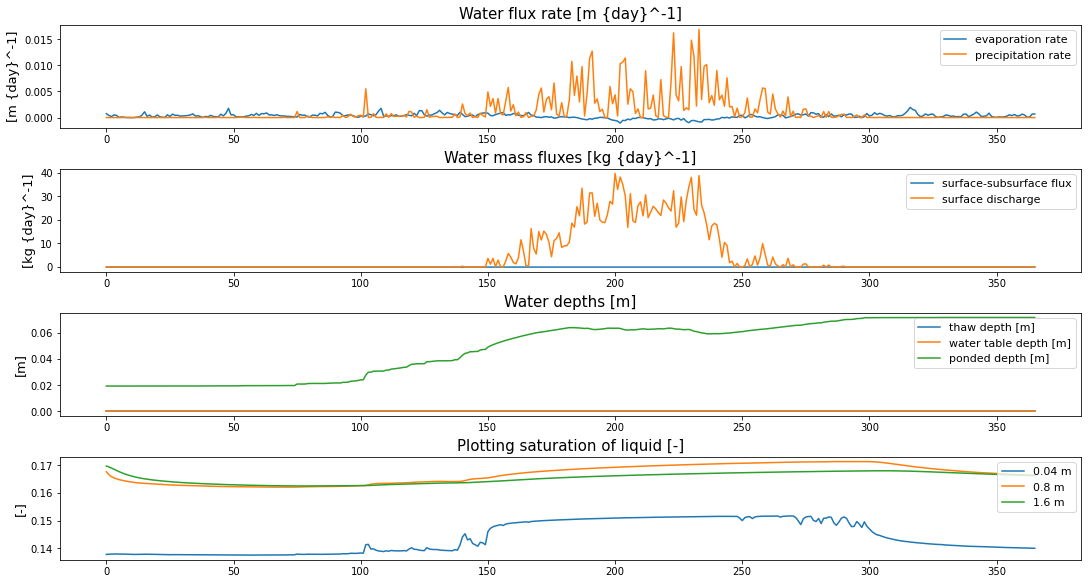

In [48]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
#f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting water fluxes
f2_ax1.set_title('Water flux rate [m {day}^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['evaporation rate [m s^-1]']*86400, label='evaporation rate')
f2_ax1.plot(case3_obs['precipitation rain [m s^-1]']*86400, label='precipitation rate')
#f2_ax1.plot(case3_obs['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax1.set_ylabel('[m {day}^-1]', fontsize=13)
f2_ax1.legend(fontsize=11, loc=1)


# Plotting mass fluxes [mol s^-1]
f2_ax2.set_title('Water mass fluxes [kg {day}^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['surface-subsurface flux [mol s^-1]']*18.02*86400/1000, label="surface-subsurface flux")
f2_ax2.plot(case3_obs['discharge [mol s^-1]']*18.02*86400/1000, label="surface discharge")
f2_ax2.set_ylabel('[kg {day}^-1]', fontsize=13)
f2_ax2.legend(fontsize=11, loc=1)

# Plotting depths [m]
f2_ax3.set_title('Water depths [m]', fontsize=15)
f2_ax3.plot(case3_obs['thaw depth [m]'], label='thaw depth [m]')
f2_ax3.plot(case3_obs['water table depth [m]'], label='water table depth [m]')
f2_ax3.plot(case3_obs['ponded depth [m]'], label='ponded depth [m]')
f2_ax3.set_ylabel('[m]', fontsize=13)
#f2_ax3.plot(case3_obs['unfrozen effective depth [m]'], label='unfrozen effective depth [m]')
f2_ax3.legend(fontsize=11, loc=1)

# Plotting snow density [kg m^-3]
#f2_ax4.set_title('Snow density [kg m^-3]')
#f2_ax4.plot(case3_obs['snow-density [kg m^-3]'], label='snow density [kg m^-3]')
#f2_ax4.legend()

# Plotting saturation of liquid
f2_ax4.set_title('Plotting saturation of liquid [-]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case3_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax4.plot(case3_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax4.plot(case3_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax4.set_ylabel('[-]', fontsize=13)
f2_ax4.legend(fontsize=11, loc=1)

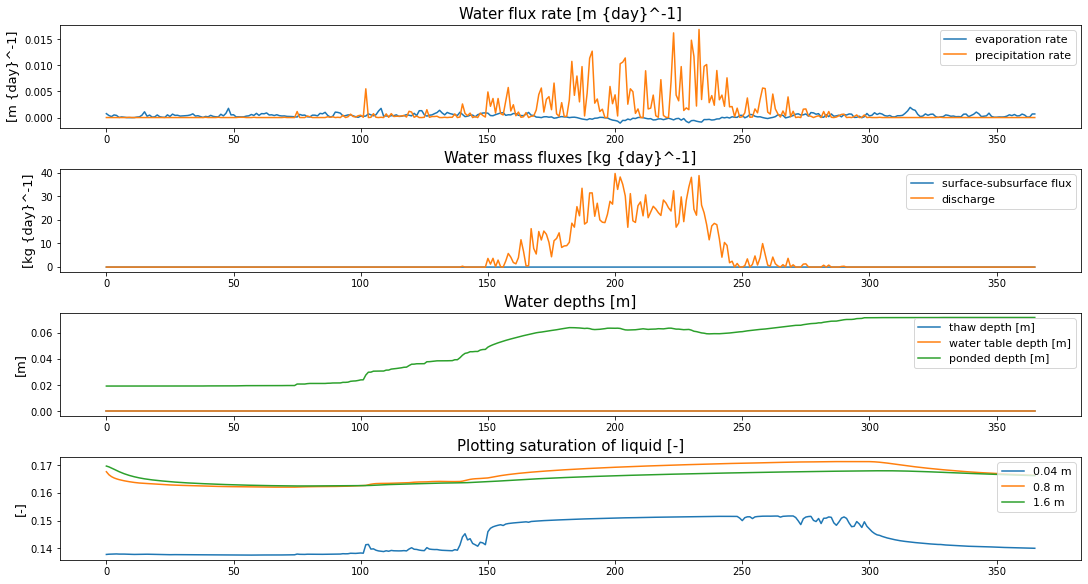

In [49]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
#f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting water fluxes
f2_ax1.set_title('Water flux rate [m {day}^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['evaporation rate [m s^-1]']*86400, label='evaporation rate')
f2_ax1.plot(case3_obs['precipitation rain [m s^-1]']*86400, label='precipitation rate')
#f2_ax1.plot(case3_obs['precipitation rain [m s^-1]']*86400 - case3_obs['evaporation rate [m s^-1]']*86400, label='Net water flux rate')
#f2_ax1.plot(case3_obs['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax1.set_ylabel('[m {day}^-1]', fontsize=13)
f2_ax1.legend(fontsize=11, loc=1)


# Plotting mass fluxes [mol s^-1]
f2_ax2.set_title('Water mass fluxes [kg {day}^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['surface-subsurface flux [mol s^-1]']*18.02*86400/1000, label="surface-subsurface flux")
f2_ax2.plot(case3_obs['discharge [mol s^-1]']*18.02*86400/1000, label="discharge")
f2_ax2.set_ylabel('[kg {day}^-1]', fontsize=13)
f2_ax2.legend(fontsize=11, loc=1)

# Plotting depths [m]
f2_ax3.set_title('Water depths [m]', fontsize=15)
f2_ax3.plot(case3_obs['thaw depth [m]'], label='thaw depth [m]')
f2_ax3.plot(case3_obs['water table depth [m]'], label='water table depth [m]')
f2_ax3.plot(case3_obs['ponded depth [m]'], label='ponded depth [m]')
f2_ax3.set_ylabel('[m]', fontsize=13)
#f2_ax3.plot(case3_obs['unfrozen effective depth [m]'], label='unfrozen effective depth [m]')
f2_ax3.legend(fontsize=11, loc=1)

# Plotting snow density [kg m^-3]
#f2_ax4.set_title('Snow density [kg m^-3]')
#f2_ax4.plot(case3_obs['snow-density [kg m^-3]'], label='snow density [kg m^-3]')
#f2_ax4.legend()

# Plotting saturation of liquid
f2_ax4.set_title('Plotting saturation of liquid [-]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case3_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax4.plot(case3_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax4.plot(case3_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax4.set_ylabel('[-]', fontsize=13)
f2_ax4.legend(fontsize=11, loc=1)

### Plotting the surface energy balance and water balance parameters:
- Surface energy source [MW m^-2], Conducted energy flux [W m^-2], Latent heat of evaporation [W m^-2], Sensible heat flux [W m^-2], Surface-subsurface energy flux [W m^-2];

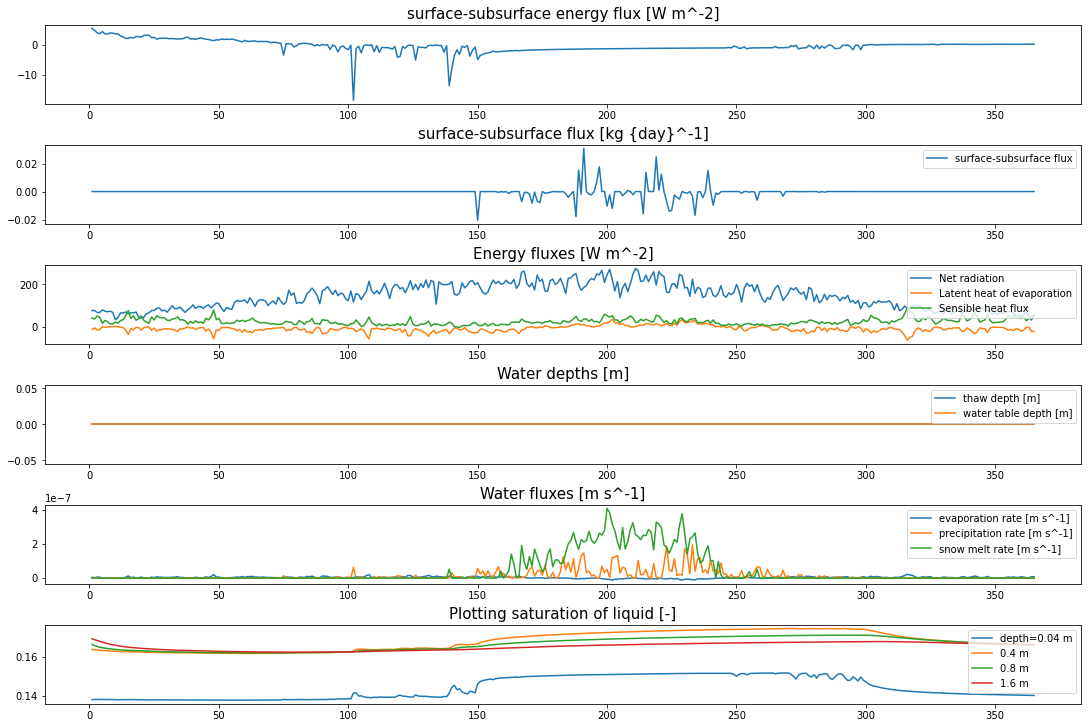

In [50]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

# Plotting Surface energy source
f2_ax1.set_title('surface-subsurface energy flux [W m^-2]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs_whbal['surface-subsurface energy flux [W m^-2]']*1e6, label='simulation')
#f2_ax1.plot(-case3_obs_whbal['surf-sub radiation [W m^-2]'], label="calculated")
# f2_ax1.legend(loc=1)

# Plotting surface - subsurface water fluxes
f2_ax2.set_title('surface-subsurface flux [kg {day}^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs_whbal['surface-subsurface flux [mol s^-1]']*18.02*86400/1000, label="surface-subsurface flux")
f2_ax2.legend(loc=1)

# Plotting Energy fluxes
f2_ax3.set_title('Energy fluxes [W m^-2]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case3_obs_whbal['net radiation [W m^-2]'], label='Net radiation')
f2_ax3.plot(case3_obs_whbal['latent heat of evaporation [W m^-2]'], label="Latent heat of evaporation")
f2_ax3.plot(case3_obs_whbal['sensible heat flux [W m^-2]'], label="Sensible heat flux")
#f2_ax2.plot(case3_obs_whbal['surf-sub radiation [W m^-2]'], label="surf-sub radiation")
#f2_ax2.plot(case3_obs_whbal['surface-subsurface energy flux [W m^-2]'], label="surface-subsurface energy flux")
#f2_ax2.plot(data_AWS_input_cyclic_Case3['Incoming shortwave radiation (W/m^2)'].values, label="inc sw")
f2_ax3.legend(loc=1)


# Plotting surface-subsurface flux [mol s^-1]
f2_ax4.set_title('Water depths [m]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case3_obs_whbal['thaw depth [m]'], label='thaw depth [m]')
f2_ax4.plot(case3_obs_whbal['water table depth [m]'], label='water table depth [m]')
f2_ax4.legend(loc=1)

# Plotting water fluxes
f2_ax5.set_title('Water fluxes [m s^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case3_obs_whbal['evaporation rate [m s^-1]'], label='evaporation rate [m s^-1]')
f2_ax5.plot(case3_obs_whbal['precipitation rain [m s^-1]'], label='precipitation rate [m s^-1]')
f2_ax5.plot(case3_obs_whbal['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax5.legend(loc=1)

# Plotting saturation of liquid
f2_ax6.set_title('Plotting saturation of liquid [-]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax6.plot(case3_obs_whbal['point -0.04 saturation liquid'],label='depth=0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax6.plot(case3_obs_whbal['point -0.4 saturation liquid'],label='0.4 m')
f2_ax6.plot(case3_obs_whbal['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax6.plot(case3_obs_whbal['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs_whbal['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs_whbal['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax6.legend(loc=1)

* Comments:


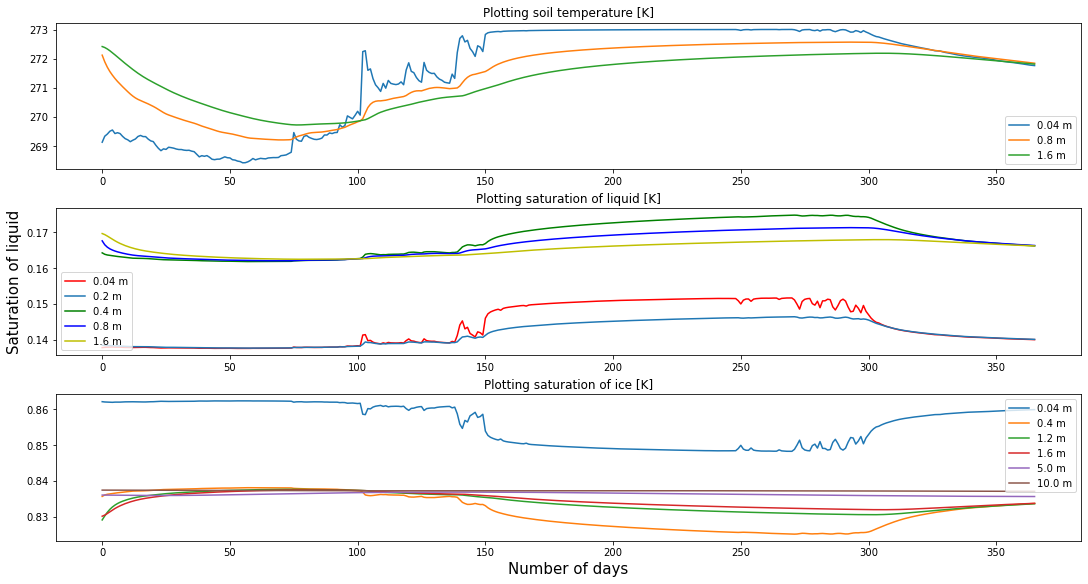

In [51]:
### Plotting the final results (mesured vs simulated) along with the parameters:

fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_case1['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_case1['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(case3_obs['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_case1['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(case3_obs['point -1.6 temperature [K]'],label='1.6 m')
#f2_ax1.plot(case3_obs['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_case1['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(case3_obs['point -20.0 temperature [K]'],label='20.0 m')
#f2_ax1.plot(case3_obs['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(case3_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(case3_obs['point -0.4 saturation liquid'],'g',label='0.4 m')
f2_ax2.plot(case3_obs['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(case3_obs['point -1.6 saturation liquid'],'y',label='1.6 m')
#f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'],'r--',label='s - 0.04 m')
#f2_ax2.plot(df_obs_AWS['point -0.4 saturation liquid'],'g--',label='s - 0.4 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'],'b--',label='s - 0.8 m')
#f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'],'y--',label='s - 1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case3_obs['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_case1['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(case3_obs['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_case1['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(case3_obs['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(case3_obs['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(case3_obs['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(case3_obs['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()

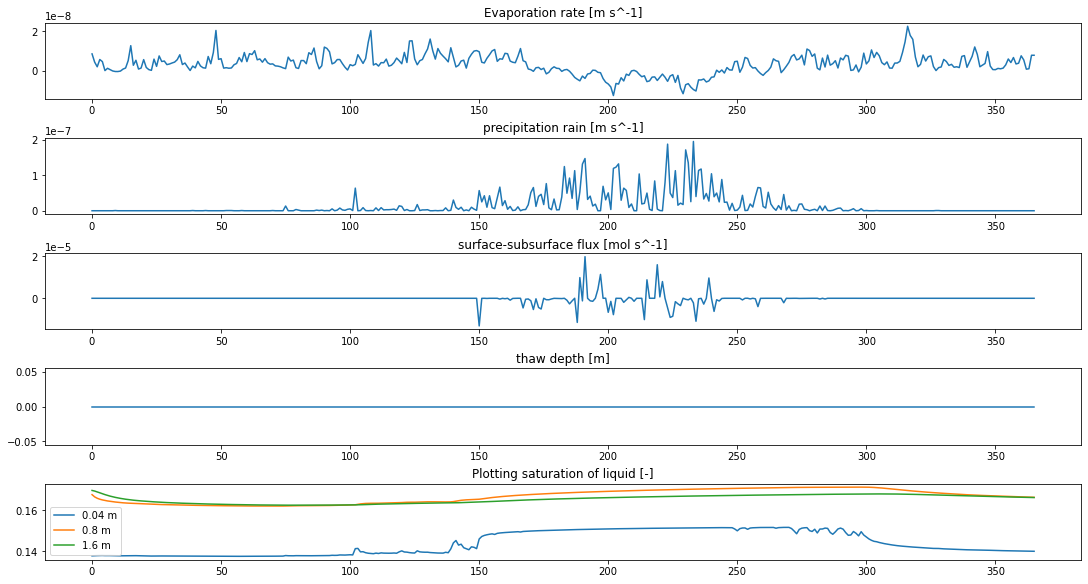

In [52]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting Evaporation rate
f2_ax1.set_title('Evaporation rate [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['evaporation rate [m s^-1]'])

# Plotting precipitation rate
f2_ax2.set_title('precipitation rain [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['precipitation rain [m s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax3.set_title('surface-subsurface flux [mol s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case3_obs['surface-subsurface flux [mol s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax4.set_title('thaw depth [m]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case3_obs['thaw depth [m]'])

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case3_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(case3_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(case3_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()

### Surface water balance variables
- evaporation rate [m s^-1], surface-subsurface flux [mol s^-1], surface-precipitation rain [m s^-1], discharge [mol s^-1], precipitation snow [m s^-1], snow melt [m s^-1], thaw depth [m], water table depth [m], ponded depth [m], unfrozen effective depth [m], snow-density [kg m^-3]

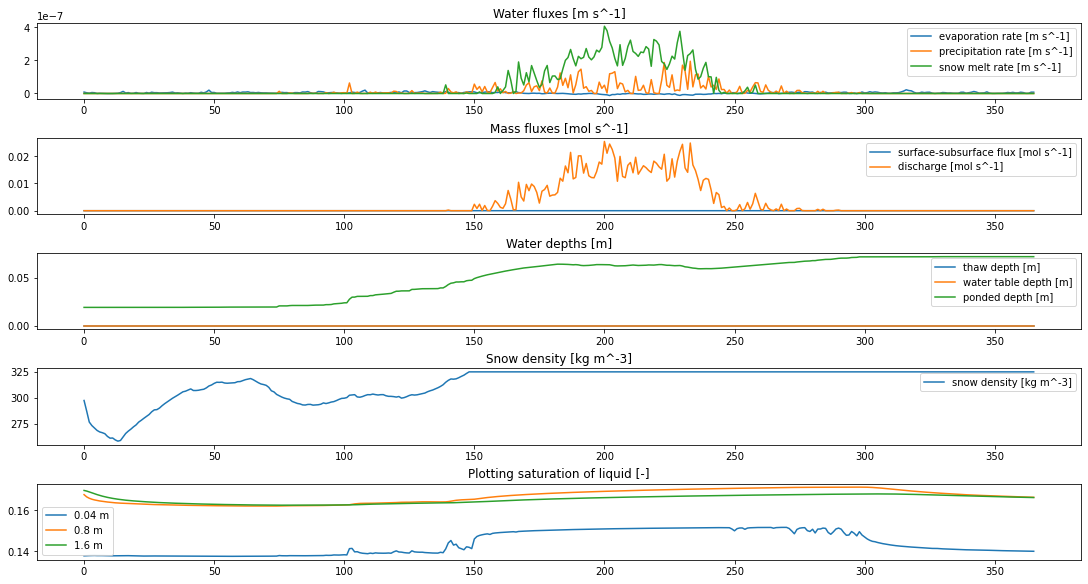

In [53]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting water fluxes
f2_ax1.set_title('Water fluxes [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['evaporation rate [m s^-1]'], label='evaporation rate [m s^-1]')
f2_ax1.plot(case3_obs['precipitation rain [m s^-1]'], label='precipitation rate [m s^-1]')
f2_ax1.plot(case3_obs['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax1.legend()


# Plotting mass fluxes [mol s^-1]
f2_ax2.set_title('Mass fluxes [mol s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['surface-subsurface flux [mol s^-1]'], label="surface-subsurface flux [mol s^-1]")
f2_ax2.plot(case3_obs['discharge [mol s^-1]'], label="discharge [mol s^-1]")
f2_ax2.legend()

# Plotting depths [m]
f2_ax3.set_title('Water depths [m]')
f2_ax3.plot(case3_obs['thaw depth [m]'], label='thaw depth [m]')
f2_ax3.plot(case3_obs['water table depth [m]'], label='water table depth [m]')
f2_ax3.plot(case3_obs['ponded depth [m]'], label='ponded depth [m]')
#f2_ax3.plot(case3_obs['unfrozen effective depth [m]'], label='unfrozen effective depth [m]')
f2_ax3.legend()

# Plotting snow density [kg m^-3]
f2_ax4.set_title('Snow density [kg m^-3]')
f2_ax4.plot(case3_obs['snow-density [kg m^-3]'], label='snow density [kg m^-3]')
f2_ax4.legend()

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case3_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(case3_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(case3_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()

### Plotting the surface energy balance and water balance parameters:
- Surface energy source [MW m^-2], Conducted energy flux [W m^-2], Latent heat of evaporation [W m^-2], Sensible heat flux [W m^-2], Surface-subsurface energy flux [W m^-2];

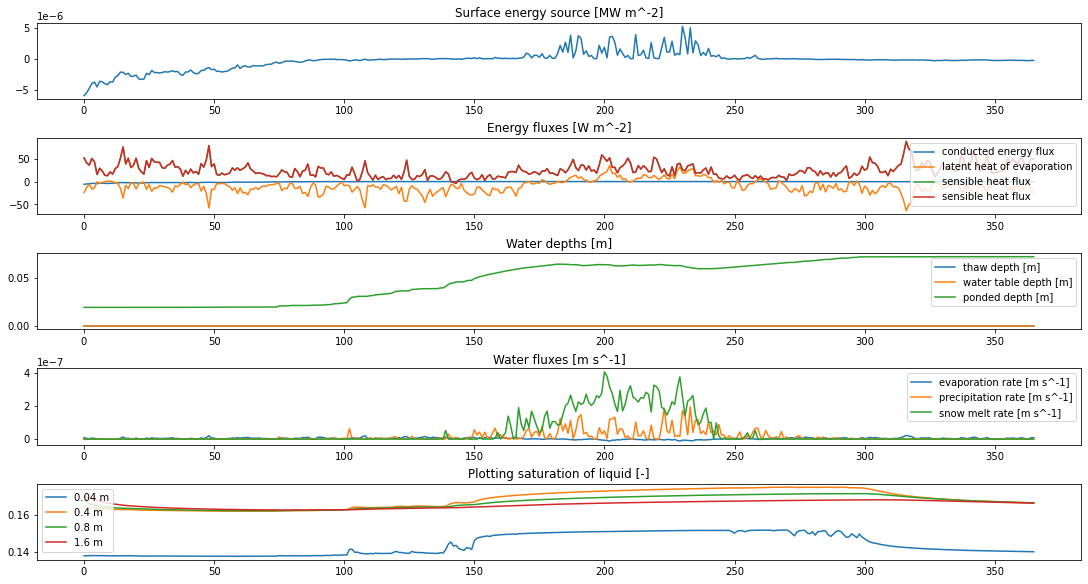

In [54]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting Surface energy source
f2_ax1.set_title('Surface energy source [MW m^-2]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['surface energy source [MW m^-2]'])

# Plotting Energy fluxes
f2_ax2.set_title('Energy fluxes [W m^-2]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['conducted energy flux [W m^-2]'], label='conducted energy flux')
f2_ax2.plot(case3_obs['latent heat of evaporation [W m^-2]'], label="latent heat of evaporation")
f2_ax2.plot(case3_obs['sensible heat flux [W m^-2]'], label="sensible heat flux")
f2_ax2.plot(case3_obs['sensible heat flux [W m^-2]'], label="sensible heat flux")
#f2_ax2.plot(case3_obs['surface-subsurface energy flux [W m^-2]'], label="surface-subsurface energy flux")
f2_ax2.legend()


# Plotting surface-subsurface flux [mol s^-1]
f2_ax3.set_title('Water depths [m]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case3_obs['thaw depth [m]'], label='thaw depth [m]')
f2_ax3.plot(case3_obs['water table depth [m]'], label='water table depth [m]')
f2_ax3.plot(case3_obs['ponded depth [m]'], label='ponded depth [m]')
f2_ax3.legend()

# Plotting water fluxes
f2_ax4.set_title('Water fluxes [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case3_obs['evaporation rate [m s^-1]'], label='evaporation rate [m s^-1]')
f2_ax4.plot(case3_obs['precipitation rain [m s^-1]'], label='precipitation rate [m s^-1]')
f2_ax4.plot(case3_obs['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax4.legend()

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case3_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax5.plot(case3_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(case3_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(case3_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()


### Plotting both Case 2 and Case 3 variables

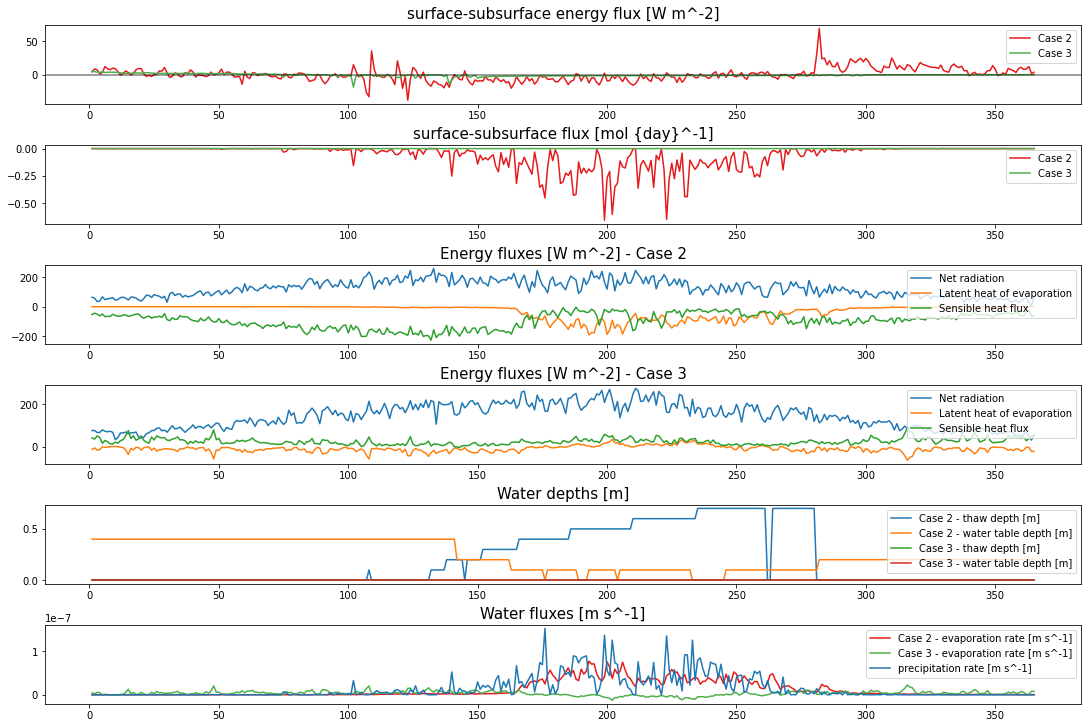

In [72]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

# Plotting Surface energy source
f2_ax1.set_title('surface-subsurface energy flux [W m^-2]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case2_obs_whbal['surface-subsurface energy flux [W m^-2]']*1e6, color="#e41a1c", label='Case 2')
f2_ax1.plot(case3_obs_whbal['surface-subsurface energy flux [W m^-2]']*1e6, color="#4daf4a", label='Case 3')
f2_ax1.axhline(y=0, color='k',alpha=0.5)
#f2_ax1.plot(-case2_obs_whbal['surf-sub radiation [W m^-2]'], label="calculated")
f2_ax1.legend(loc=1)

# Plotting surface - subsurface water fluxes
f2_ax2.set_title('surface-subsurface flux [mol {day}^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case2_obs_whbal['surface-subsurface flux [mol s^-1]']*86400/1000, color="#e41a1c", label="Case 2")
f2_ax2.plot(case3_obs_whbal['surface-subsurface flux [mol s^-1]']*86400/1000, color="#4daf4a", label="Case 3")

f2_ax2.legend(loc=1)

# Plotting Energy fluxes
f2_ax3.set_title('Energy fluxes [W m^-2] - Case 2', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case2_obs_whbal['net radiation [W m^-2]'], label='Net radiation')
f2_ax3.plot(case2_obs_whbal['latent heat of evaporation [W m^-2]'], label="Latent heat of evaporation")
f2_ax3.plot(case2_obs_whbal['sensible heat flux [W m^-2]'], label="Sensible heat flux")
f2_ax3.legend(loc=1)

# Plotting Energy fluxes
f2_ax4.set_title('Energy fluxes [W m^-2] - Case 3', fontsize=15)
f2_ax4.plot(case3_obs_whbal['net radiation [W m^-2]'], label='Net radiation')
f2_ax4.plot(case3_obs_whbal['latent heat of evaporation [W m^-2]'], label="Latent heat of evaporation")
f2_ax4.plot(case3_obs_whbal['sensible heat flux [W m^-2]'], label="Sensible heat flux")
#f2_ax2.plot(case2_obs_whbal['surf-sub radiation [W m^-2]'], label="surf-sub radiation")
#f2_ax2.plot(case2_obs_whbal['surface-subsurface energy flux [W m^-2]'], label="surface-subsurface energy flux")
#f2_ax2.plot(data_AWS_input_cyclic_Case3['Incoming shortwave radiation (W/m^2)'].values, label="inc sw")
f2_ax4.legend(loc=1)


# Plotting surface-subsurface flux [mol s^-1]
f2_ax5.set_title('Water depths [m]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case2_obs_whbal['thaw depth [m]'], label='Case 2 - thaw depth [m]')
f2_ax5.plot(case2_obs_whbal['water table depth [m]'], label='Case 2 - water table depth [m]')
f2_ax5.plot(case3_obs_whbal['thaw depth [m]'], label='Case 3 - thaw depth [m]')
f2_ax5.plot(case3_obs_whbal['water table depth [m]'], label='Case 3 - water table depth [m]')
f2_ax5.legend(loc=1)

# Plotting water fluxes
f2_ax6.set_title('Water fluxes [m s^-1]', fontsize=15)
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax6.plot(case2_obs_whbal['evaporation rate [m s^-1]'], color="#e41a1c", label='Case 2 - evaporation rate [m s^-1]')
f2_ax6.plot(case3_obs_whbal['evaporation rate [m s^-1]'], color="#4daf4a", label='Case 3 - evaporation rate [m s^-1]')
f2_ax6.plot(case2_obs_whbal['precipitation rain [m s^-1]'], label='precipitation rate [m s^-1]')
#f2_ax6.plot(case3_obs_whbal['snow melt [m s^-1]'], label='Case 3 - snow melt rate [m s^-1]')
#f2_ax4.plot(case2_obs_whbal['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax6.legend(loc=1)



### Plotting the results with measured values

Text(0.5, 0, 'Days')

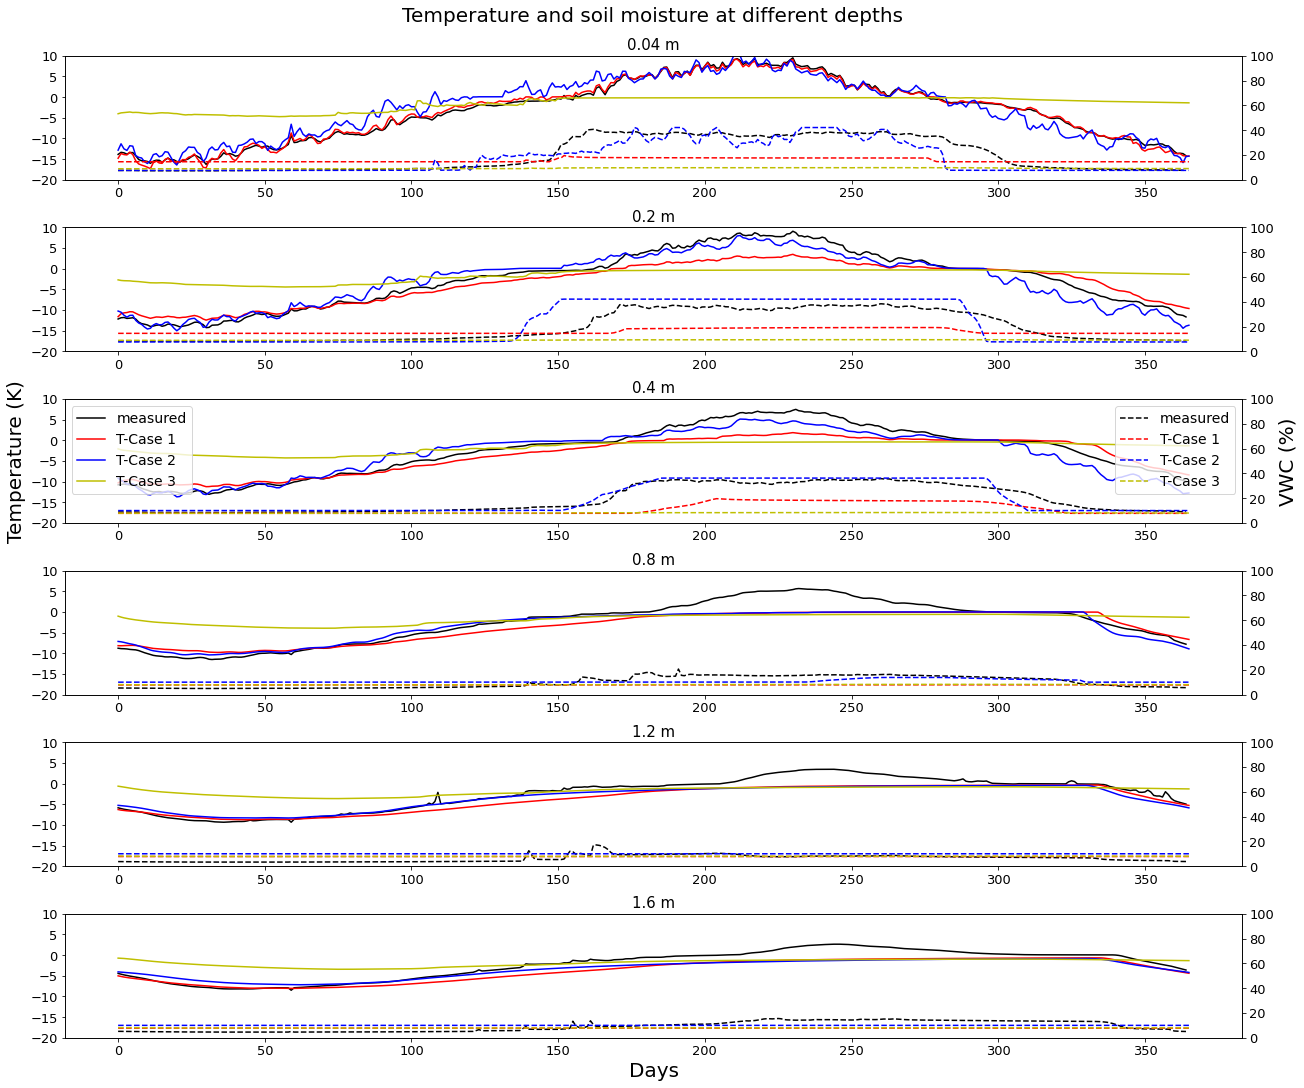

In [206]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]


for j, depth in enumerate(depths):
    
    locals()['f2_ax'+str(j+1)].plot(df_obs_AWS_cyclic[f'Soil temperature at - {depth} m (°C)'], 'k', label=f'measured')
    locals()['f2_ax'+str(j+1)].plot(case1_obs[f'Soil temperature at - {depth} m (°C)'], 'r', label=f'T-Case 1')
    locals()['f2_ax'+str(j+1)].plot(case2_obs[f'Soil temperature at - {depth} m (°C)'], 'b', label=f'T-Case 2')
    locals()['f2_ax'+str(j+1)].plot(case3_obs[f'Soil temperature at - {depth} m (°C)'], 'y', label=f'T-Case 3')
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_4[x:x+1096].values, 'g', label=f'T-Case 3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    #locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(-20,10)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(df_obs_AWS_cyclic[f'Soil moisture at - {depth} m (%)'], 'k--', label=f'measured')
    ax2.plot(case1_obs[f'Soil moisture at - {depth} m (%)'], 'r--', label=f'T-Case 1')
    ax2.plot(case2_obs[f'Soil moisture at - {depth} m (%)'], 'b--', label=f'T-Case 2')
    ax2.plot(case3_obs[f'Soil moisture at - {depth} m (%)'], 'y--', label=f'T-Case 3')
    #ax2.plot(time_period, mois_sim_4[x:x+1096].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

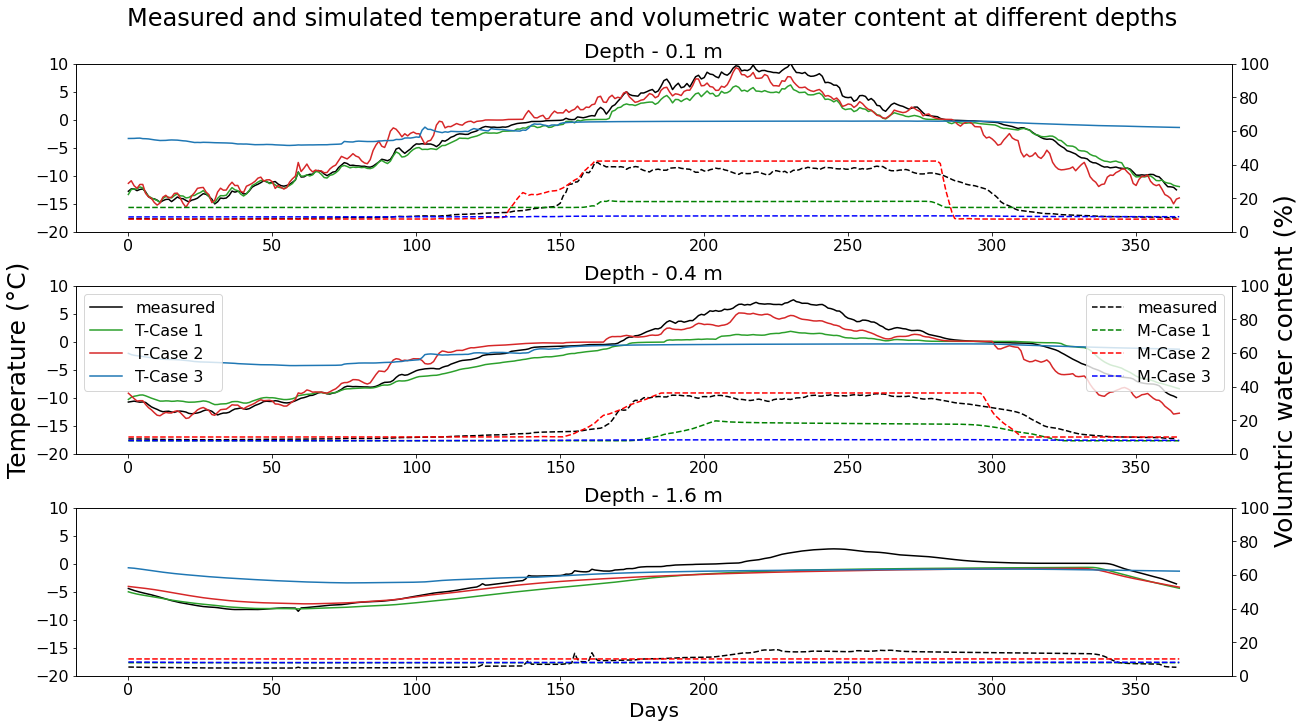

In [207]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
#f2_ax4 = fig2.add_subplot(spec2[3, 0])
#f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Measured and simulated temperature and volumetric water content at different depths', fontsize=24)


depths = [0.1, 0.4, 1.6]


for j, depth in enumerate(depths):
    
    locals()['f2_ax'+str(j+1)].plot(df_obs_AWS_cyclic[f'Soil temperature at - {depth} m (°C)'], 'k', label=f'measured')
    locals()['f2_ax'+str(j+1)].plot(case1_obs[f'Soil temperature at - {depth} m (°C)'], 'tab:green', label=f'T-Case 1')
    locals()['f2_ax'+str(j+1)].plot(case2_obs[f'Soil temperature at - {depth} m (°C)'], 'tab:red', label=f'T-Case 2')
    locals()['f2_ax'+str(j+1)].plot(case3_obs[f'Soil temperature at - {depth} m (°C)'], 'tab:blue', label=f'T-Case 3')
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_4[x:x+1096].values, 'g', label=f'T-Case 3')
    locals()['f2_ax'+str(j+1)].set_title(f'Depth - {depth} m', fontsize=20)
    #locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(-20,10)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(df_obs_AWS_cyclic[f'Soil moisture at - {depth} m (%)'], 'k--', label=f'measured')
    ax2.plot(case1_obs[f'Soil moisture at - {depth} m (%)'], 'g--', label=f'M-Case 1')
    ax2.plot(case2_obs[f'Soil moisture at - {depth} m (%)'], 'r--', label=f'M-Case 2')
    ax2.plot(case3_obs[f'Soil moisture at - {depth} m (%)'], 'b--', label=f'M-Case 3')
    #ax2.plot(time_period, mois_sim_4[x:x+1096].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(16)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(16)
    
    if j == 1:
        locals()['f2_ax'+str(j+1)].legend(fontsize=16, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (°C)', fontsize=25)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=16, loc=1)  
        ax2.set_ylabel('Volumtric water content (%)', fontsize=25)

f2_ax3.set_xlabel('Days', fontsize=20)

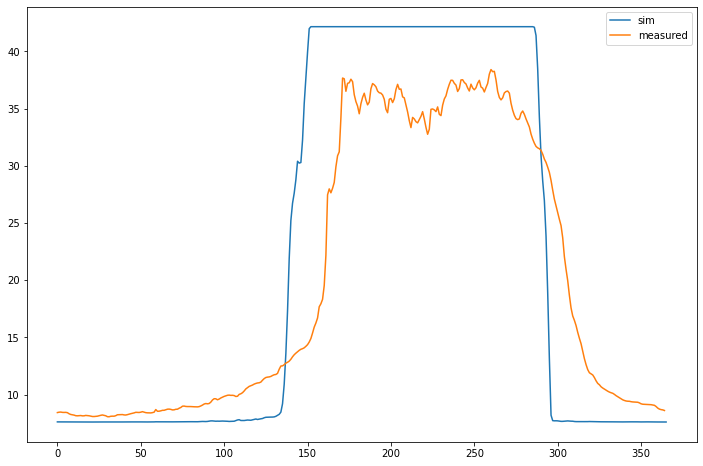

In [208]:
plt.figure(figsize=(12,8))
plt.plot(case2_obs['Soil moisture at - 0.2 m (%)'],label='sim')
plt.plot(df_obs_AWS_cyclic['Soil moisture at - 0.2 m (%)'],label='measured')
plt.legend()

### Plotting the surface energy balance variables:

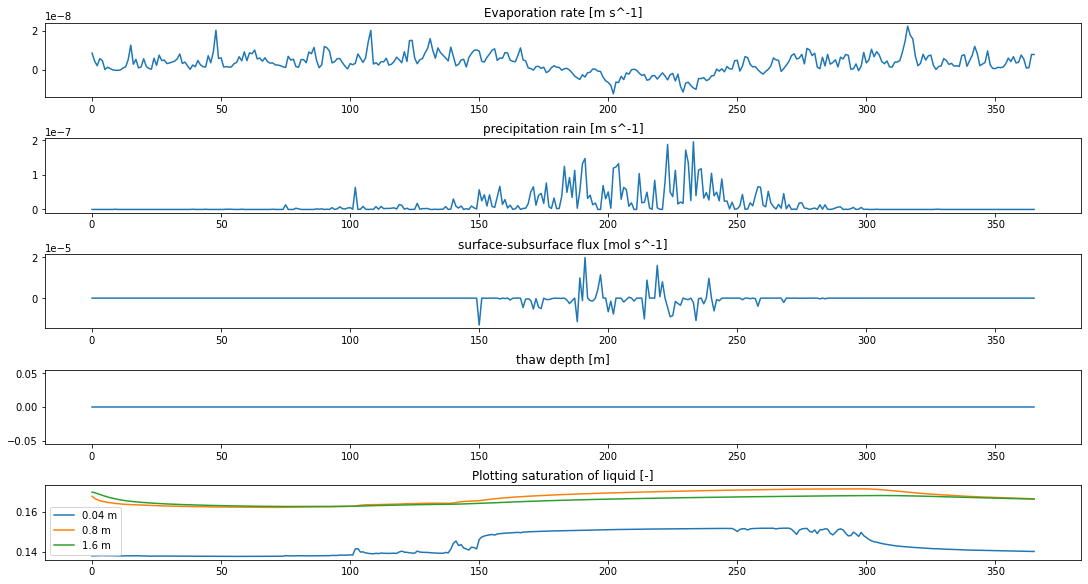

In [209]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting Evaporation rate
f2_ax1.set_title('Evaporation rate [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['evaporation rate [m s^-1]'])

# Plotting precipitation rate
f2_ax2.set_title('precipitation rain [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['precipitation rain [m s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax3.set_title('surface-subsurface flux [mol s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case3_obs['surface-subsurface flux [mol s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax4.set_title('thaw depth [m]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case3_obs['thaw depth [m]'])

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case3_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(case3_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(case3_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()